# Demographic Patterns of Anxiety and Depression Prevalence - A Comprehensive Analysis 
***
### <span style='color:Red'> Purpose </span>
The US Census Bureau has been distributing household surveys over the course of the COVID-19 pandemic and afterward to determine the impact on mental health. The National Center for Health Statistics congregated this survey data into a user friendly data set acccessible by the public. The purpose of this comprehensive analysis is to look at anxiety and depression indicators and the varying demographics to further understand the distribution of mental health in the United States. This dataset includes the value of reported symptoms during the last 7 days of anxiety or depression. 

### <span style='color:Red'> Included in this analysis: </span>

**1. Data Processing and Cleaning** 
- Importing packages, data, and dropping necessary columns within the DataFrame. 
- The dataset is seperated into two distinct DataFrames for anxiety and for depression to help with analysis. 
- Data cleaning and initial exploration. 

**2. Demographics**
- There are 7 demographics that will be explored along with a base understanding of national estimates. Each demographics will be seperated and explored. 

**3. Final Insights and Conclusions** 
- The final demographic insights are included and the final conclusions are made. 

**4. Next Steps**

# Data Processing and Cleaning 
***
### <span style='color:Red'>Installing packages and importing data </span>

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import packages

import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
# Import data 
df = pd.read_csv('C:/Users/Makayla Avendano/Desktop/indicators.csv')

In [5]:
# Look at dataframe columns, non-null counts, and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14373 entries, 0 to 14372
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               14373 non-null  object 
 1   Group                   14373 non-null  object 
 2   State                   14373 non-null  object 
 3   Subgroup                14373 non-null  object 
 4   Phase                   14373 non-null  object 
 5   Time Period             14373 non-null  int64  
 6   Time Period Label       14373 non-null  object 
 7   Time Period Start Date  14373 non-null  object 
 8   Time Period End Date    14373 non-null  object 
 9   Value                   13752 non-null  float64
 10  Low CI                  13752 non-null  float64
 11  High CI                 13752 non-null  float64
 12  Confidence Interval     13752 non-null  object 
 13  Quartile Range          9486 non-null   object 
dtypes: float64(3), int64(1), object(10)
me

In [6]:
# Drop unnecessary columns not used in data exploration 
df = df.drop(columns=['Confidence Interval', 'Quartile Range'])

In [7]:
# Assigning new race values for column Subgroup 
new = {'Hispanic or Latino': 'Hispanic or Latino', 'Non-Hispanic Asian, single race': 'Asian', 
       'Non-Hispanic Black, single race': 'Black', 'Non-Hispanic White, single race': 'White', 
       'Non-Hispanic, other races and multiple races': 'Other and Multiple Races'}

df['Subgroup'] = df['Subgroup'].replace(new)

In [8]:
# Converting into Date and Time values 
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])
df['Time Period End Date'] = pd.to_datetime(df['Time Period End Date'])

df['Year'] = df['Time Period Start Date'].dt.year
df['Month'] = df['Time Period Start Date'].dt.month

df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [9]:
# Looking at the new columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14373 entries, 0 to 14372
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               14373 non-null  object        
 1   Group                   14373 non-null  object        
 2   State                   14373 non-null  object        
 3   Subgroup                14373 non-null  object        
 4   Phase                   14373 non-null  object        
 5   Time Period             14373 non-null  int64         
 6   Time Period Label       14373 non-null  object        
 7   Time Period Start Date  14373 non-null  datetime64[ns]
 8   Time Period End Date    14373 non-null  datetime64[ns]
 9   Value                   13752 non-null  float64       
 10  Low CI                  13752 non-null  float64       
 11  High CI                 13752 non-null  float64       
 12  Year                    14373 non-null  int32 

In [10]:
# With an initial look at the Excel file, it was evident that any rows where Phase was equal to -1 did not have any data associated with it. 
# Therefore, all rows that had this value were dropped. 

df = df.drop(df[df['Phase'] == '-1'].index)

### <span style='color:Red'>Seperating the Dataset</span>

To make the data easier to explore, the data will be seperated into seperate DataFrames for Anxiety and Depression. 


In [11]:
# Seperating into seperate DataFrames for anxiety and depression 
depression = df[df['Indicator'].isin(['Symptoms of Depressive Disorder', 
                                      'Symptoms of Anxiety Disorder or Depressive Disorder'])]
anxiety = df[df['Indicator'].isin(['Symptoms of Anxiety Disorder', 
                                   'Symptoms of Anxiety Disorder or Depressive Disorder'])]

In [12]:
# Looking at columns 
depression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9168 entries, 0 to 14372
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               9168 non-null   object        
 1   Group                   9168 non-null   object        
 2   State                   9168 non-null   object        
 3   Subgroup                9168 non-null   object        
 4   Phase                   9168 non-null   object        
 5   Time Period             9168 non-null   int64         
 6   Time Period Label       9168 non-null   object        
 7   Time Period Start Date  9168 non-null   datetime64[ns]
 8   Time Period End Date    9168 non-null   datetime64[ns]
 9   Value                   9168 non-null   float64       
 10  Low CI                  9168 non-null   float64       
 11  High CI                 9168 non-null   float64       
 12  Year                    9168 non-null   int32       

In [13]:
# Looking at columns 
anxiety.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9168 entries, 70 to 14372
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               9168 non-null   object        
 1   Group                   9168 non-null   object        
 2   State                   9168 non-null   object        
 3   Subgroup                9168 non-null   object        
 4   Phase                   9168 non-null   object        
 5   Time Period             9168 non-null   int64         
 6   Time Period Label       9168 non-null   object        
 7   Time Period Start Date  9168 non-null   datetime64[ns]
 8   Time Period End Date    9168 non-null   datetime64[ns]
 9   Value                   9168 non-null   float64       
 10  Low CI                  9168 non-null   float64       
 11  High CI                 9168 non-null   float64       
 12  Year                    9168 non-null   int32      

### <span style='color:Red'>Cleaning the Dataset</span> 

Checking duplicates and missing values within the dataset.

In [14]:
# Duplicates
dep_duplicates = depression.duplicated()
print(dep_duplicates.value_counts())

False    9168
Name: count, dtype: int64


In [15]:
# Duplicates
anx_duplicates = anxiety.duplicated()
print(anx_duplicates.value_counts())

False    9168
Name: count, dtype: int64


In [16]:
# Missing Values
depression.isnull().sum()

Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
Low CI                    0
High CI                   0
Year                      0
Month                     0
dtype: int64

In [17]:
anxiety.isnull().sum()

Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
Low CI                    0
High CI                   0
Year                      0
Month                     0
dtype: int64

### <span style='color:Red'>Exploring the Data</span>

Looking at all groups or demographics. A table is included with the group (demographic) and subgroup or the values within the demographics. 

In [18]:
df['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-baqh">Group</th>
    <th class="tg-baqh">Subgroup</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-baqh">National Estimate</td>
    <td class="tg-baqh">None</td>
  </tr>
  <tr>
    <td class="tg-baqh">Age</td>
    <td class="tg-baqh">18-29<br>30-39<br>40-49<br>50-59<br>60-69<br>70-79<br>80 and above</td>
  </tr>
  <tr>
    <td class="tg-baqh">Sex</td>
    <td class="tg-baqh">Male <br>Female</td>
  </tr>
  <tr>
    <td class="tg-baqh">Race</td>
    <td class="tg-baqh">Hispanic or Latino<br>Non-Hispanic White, Single Race <br>Non-Hispanic Black, Single Race <br>Non-Hispanic Asian, Single Race <br>Non-Hispanic Other, Single Race </td>
  </tr>
  <tr>
    <td class="tg-baqh">Education</td>
    <td class="tg-baqh">Less than High School<br>High School Diploma<br>Some College <br>Bachelors or Higher </td>
  </tr>
  <tr>
    <td class="tg-baqh">State</td>
    <td class="tg-baqh">All 50 States </td>
  </tr>
  <tr>
    <td class="tg-baqh">Disability Status</td>
    <td class="tg-baqh">With Disability <br>Without Disability </td>
  </tr>
  <tr>
    <td class="tg-baqh">Gender Identity</td>
    <td class="tg-baqh">Cis-Gender Male <br>Cis-Gender Female <br>Transgender </td>
  </tr>
  <tr>
    <td class="tg-baqh">Sexual Orientation</td>
    <td class="tg-baqh">Bisexual<br>Gay or Lesbian <br>Straight <br></td>
  </tr>
</tbody>
</table>

# Demographics 


## National Estimates
***

In [27]:
# Seperate for demographic analysis, beginning with depression
depression_national = depression[depression['Group'] == 'National Estimate']
depression_national.describe()

,Time Period,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Year
count,124.000000,124,124,124.000000,124.000000,124.000000,124.000000
mean,31.500000,2021-08-24 21:17:25.161290240,2021-09-04 14:42:34.838709760,29.331452,28.596774,30.078226,2021.161290
min,1.000000,2020-04-23 00:00:00,2020-05-05 00:00:00,19.000000,18.400000,19.700000,2020.000000
25%,16.000000,2020-09-30 00:00:00,2020-10-12 00:00:00,23.425000,22.650000,24.200000,2020.000000
50%,31.500000,2021-06-02 00:00:00,2021-06-14 00:00:00,29.300000,28.500000,30.150000,2021.000000
75%,47.000000,2022-06-29 00:00:00,2022-07-11 00:00:00,33.525000,32.825000,34.225000,2022.000000
max,62.000000,2023-09-20 00:00:00,2023-10-02 00:00:00,42.600000,41.800000,43.400000,2023.000000
std,17.968129,NaN,NaN,6.206754,6.177733,6.232965,1.069816


In [20]:
# Get the dates for the data within the data set 
dep_start = depression_national['Time Period Start Date'].min()
dep_end = depression_national['Time Period End Date'].max()

# Format the date to be more readable
for_dep_start = dep_start.strftime('%m-%d-%Y')
for_dep_end = dep_end.strftime('%m-%d-%Y')

print("The starting date of the survey is ", for_dep_start)
print("The starting date of the survey is ", for_dep_end)
print("The survey ranges from the following dates: ", for_dep_start, "to", for_dep_end)

The starting date of the survey is  04-23-2020
The starting date of the survey is  10-02-2023
The survey ranges from the following dates:  04-23-2020 to 10-02-2023


### <span style='color:Red'>Depression - All Data</span>

Looking at the average, minimum, maximum, and median symptom values. 


In [21]:
# Overall average of survey data
avg_dep = depression_national['Value'].mean()
rou_avg_dep = avg_dep.round(2)
print("From 04-23-2020 to 10-02-2023, the average percent of individuals with depression symptoms is: ", rou_avg_dep)

From 04-23-2020 to 10-02-2023, the average percent of individuals with depression symptoms is:  29.33


In [22]:
# Overall minimuim of survey data
min_dep = depression_national['Value'].min()
rou_min_dep = min_dep.round(2)
print("From 04-23-2020 to 10-02-2023, the minimuim percent of individuals with depression symptoms is: ", rou_min_dep)

From 04-23-2020 to 10-02-2023, the minimuim percent of individuals with depression symptoms is:  19.0


In [23]:
min_dep = depression_national['Value'].min()
start_end_values = depression_national.loc[depression_national['Value'] == min_dep, ['Time Period Start Date', 'Time Period End Date']]
print(start_end_values)

      Time Period Start Date Time Period End Date
13905             2023-08-23           2023-09-04


In [24]:
# Overall maximuim of survey data
max_dep = depression_national['Value'].max()
rou_max_dep = max_dep.round(2)
print("From 04-23-2020 to 10-02-2023, the maximuim percent of individuals with depression symptoms is: ", rou_max_dep)

From 04-23-2020 to 10-02-2023, the maximuim percent of individuals with depression symptoms is:  42.6


In [25]:
# Find the dates that the max depression value is from 
max_dep = depression_national['Value'].max()
start_end_values = depression_national.loc[depression_national['Value'] == max_dep, ['Time Period Start Date', 'Time Period End Date']]
print(start_end_values)

     Time Period Start Date Time Period End Date
3977             2020-11-11           2020-11-23


In [26]:
# Overall median of survey data
med_dep = depression_national['Value'].median()
rou_med_dep = med_dep.round(2)
print("From 04-23-2020 to 10-02-2023, the median percent of individuals with depression symptoms is: ", rou_med_dep)

From 04-23-2020 to 10-02-2023, the median percent of individuals with depression symptoms is:  29.3


### <span style='color:Red'>Depression - Yearly</span>

Looking at the average, minimum, maximum, and median symptom values. 

In [27]:
avg_year = depression_national.groupby(depression_national['Time Period Start Date'].dt.year)['Value'].mean()
print ("Average percent of individuals who have reported symptoms of depression each year:")
print(avg_year.round(2))

Average percent of individuals who have reported symptoms of depression each year:
Time Period Start Date
2020    32.02
2021    28.46
2022    28.00
2023    26.90
Name: Value, dtype: float64


In [28]:
min_year = depression_national.groupby(depression_national['Time Period Start Date'].dt.year)['Value'].min()
print ("Minimuim percent of individuals who have reported symptoms of depression each year:")
print(min_year.round(2))

Minimuim percent of individuals who have reported symptoms of depression each year:
Time Period Start Date
2020    23.5
2021    20.9
2022    21.7
2023    19.0
Name: Value, dtype: float64


In [29]:
max_year = depression_national.groupby(depression_national['Time Period Start Date'].dt.year)['Value'].max()
print ("Maximuim percent of individuals who have reported symptoms of depression each year:")
print(max_year.round(2))

Maximuim percent of individuals who have reported symptoms of depression each year:
Time Period Start Date
2020    42.6
2021    41.5
2022    36.0
2023    33.5
Name: Value, dtype: float64


In [30]:
med_year = depression_national.groupby(depression_national['Time Period Start Date'].dt.year)['Value'].median()
print ("Maximuim percent of individuals who have reported symptoms of depression each year:")
print(med_year.round(2))

Maximuim percent of individuals who have reported symptoms of depression each year:
Time Period Start Date
2020    32.05
2021    28.70
2022    27.90
2023    25.65
Name: Value, dtype: float64


### <span style='color:Red'>Depression - Monthly and Seasonal</span>

In [31]:
monthly_national_dep = depression_national.groupby(depression_national['Month'])['Value'].mean()
monthly_national_dep_sorted = monthly_national_dep.sort_values()

print(monthly_national_dep_sorted)

Month
Aug    26.962500
Apr    27.430000
Mar    28.091667
May    28.241667
Jun    28.585000
Sep    29.018750
Dec    29.600000
Jul    30.650000
Jan    30.950000
Feb    31.350000
Oct    32.316667
Nov    33.483333
Name: Value, dtype: float64


In [35]:
# By seasons
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Time Period Start Date'].dt.month.apply(season)
depression_national.loc[:, 'Season'] = depression_national['Time Period Start Date'].dt.month.apply(season)

season_dep_national = depression_national.groupby('Season')['Value'].mean().sort_values()
print(season_dep_national)

Season
Spring    27.950000
Summer    28.880000
Winter    30.568182
Fall      30.682143
Name: Value, dtype: float64


Text(0.5, 1.0, 'Individuals with Depression Symptoms')

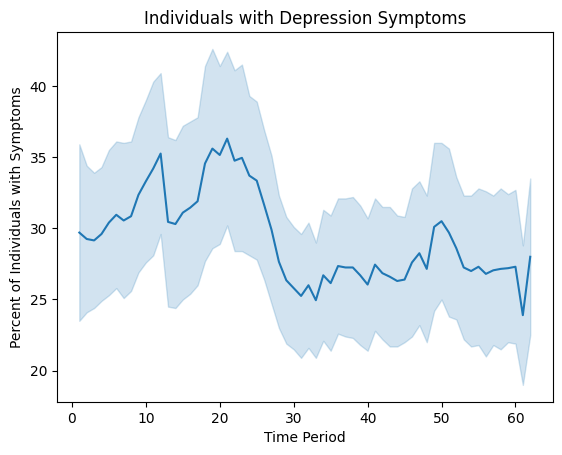

In [36]:
# Lineplot of all survey data from 04-23-2020 to 10-02-2023
# Each time period is equal to a survey period of 12 days
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Time Period', y='Value',data=depression_national)
plt.xlabel("Time Period")
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms")

Text(0.5, 1.0, 'Individuals with Depression Symptoms')

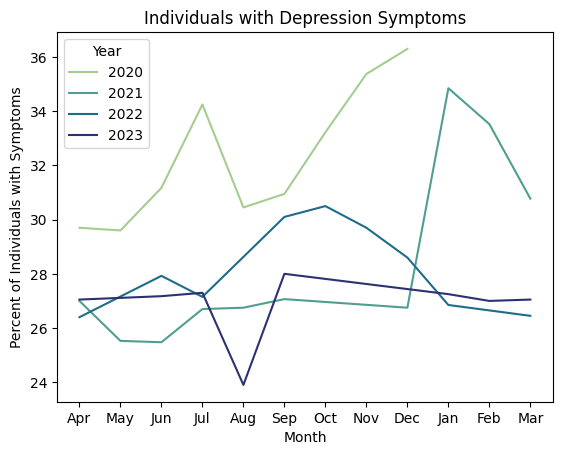

In [37]:
# Seperated by Year
# Lineplot of all survey data from 04-23-2020 to 10-02-2023
# Each time period is equal to a survey period of 12 days
import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(x='Month', y='Value',hue='Year', data=depression_national, errorbar=None, palette='crest')
plt.xlabel("Month")
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms")

### <span style='color:Red'>Anxiety - All Data</span>


In [26]:
anxiety_national = anxiety[anxiety['Group'] == 'National Estimate']

In [39]:
anxiety_national.describe()

,Time Period,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Year
count,124.000000,124,124,124.000000,124.000000,124.000000,124.000000
mean,31.500000,2021-08-24 21:17:25.161290240,2021-09-04 14:42:34.838709760,32.305645,31.558871,33.058065,2021.161290
min,1.000000,2020-04-23 00:00:00,2020-05-05 00:00:00,24.200000,23.500000,24.900000,2020.000000
25%,16.000000,2020-09-30 00:00:00,2020-10-12 00:00:00,28.800000,28.075000,29.575000,2020.000000
50%,31.500000,2021-06-02 00:00:00,2021-06-14 00:00:00,32.100000,31.300000,32.850000,2021.000000
75%,47.000000,2022-06-29 00:00:00,2022-07-11 00:00:00,35.650000,34.925000,36.500000,2022.000000
max,62.000000,2023-09-20 00:00:00,2023-10-02 00:00:00,42.600000,41.800000,43.400000,2023.000000
std,17.968129,NaN,NaN,4.206408,4.188933,4.224803,1.069816


In [40]:
# Overall average of survey data
avg_anx = anxiety_national['Value'].mean()

print("From 04-23-2020 to 10-02-2023, the average percent of individuals with anxiety symptoms is: ", avg_anx.round(2))

From 04-23-2020 to 10-02-2023, the average percent of individuals with anxiety symptoms is:  32.31


In [41]:
# Overall minimuim of survey data
min_anx = anxiety_national['Value'].min()

print("From 04-23-2020 to 10-02-2023, the average percent of individuals with anxiety symptoms is: ", min_anx.round(2))

From 04-23-2020 to 10-02-2023, the average percent of individuals with anxiety symptoms is:  24.2


In [42]:
min_anx = anxiety_national['Value'].min()
start_end_values = anxiety_national.loc[anxiety_national['Value'] == min_anx, ['Time Period Start Date', 'Time Period End Date']]
print(start_end_values)

      Time Period Start Date Time Period End Date
13983             2023-08-23           2023-09-04


In [43]:
# Overall maximuim of survey data
max_anx = anxiety_national['Value'].max()

print("From 04-23-2020 to 10-02-2023, the average percent of individuals with anxiety symptoms is: ", max_anx.round(2))

From 04-23-2020 to 10-02-2023, the average percent of individuals with anxiety symptoms is:  42.6


In [44]:
max_anx = anxiety_national['Value'].max()
start_end_values = anxiety_national.loc[anxiety_national['Value'] == max_anx, ['Time Period Start Date', 'Time Period End Date']]
print(start_end_values)

     Time Period Start Date Time Period End Date
3977             2020-11-11           2020-11-23


In [45]:
# Overall median of survey data
med_anx = anxiety_national['Value'].median()

print("From 04-23-2020 to 10-02-2023, the average percent of individuals with anxiety symptoms is: ", med_anx.round(2))

From 04-23-2020 to 10-02-2023, the average percent of individuals with anxiety symptoms is:  32.1


### <span style='color:Red'>Anxiety - Yearly </span>


In [46]:
avg_year_anx = anxiety_national.groupby(anxiety_national['Time Period Start Date'].dt.year)['Value'].mean()
print ("Average percent of individuals who have reported symptoms of anxiety each year:")
print(avg_year_anx.round(2))

# Important to note that the survey started in the middle of April 2020 and the beginning of October, causing values to be missing from each

Average percent of individuals who have reported symptoms of anxiety each year:
Time Period Start Date
2020    35.29
2021    31.08
2022    30.97
2023    29.96
Name: Value, dtype: float64


In [47]:
min_year_anx = anxiety_national.groupby(anxiety_national['Time Period Start Date'].dt.year)['Value'].min()
print ("Minimuim percent of individuals who have reported symptoms of anxiety each year:")
print(min_year_anx.round(2))

# Important to note that the survey started in the middle of April 2020 and the beginning of October, causing values to be missing from each

Minimuim percent of individuals who have reported symptoms of anxiety each year:
Time Period Start Date
2020    28.2
2021    24.5
2022    26.7
2023    24.2
Name: Value, dtype: float64


In [48]:
max_year_anx = anxiety_national.groupby(anxiety_national['Time Period Start Date'].dt.year)['Value'].max()
print ("Maximuim percent of individuals who have reported symptoms of anxiety each year:")
print(max_year_anx.round(2))

# Important to note that the survey started in the middle of April 2020 and the beginning of October, causing values to be missing from each

Maximuim percent of individuals who have reported symptoms of anxiety each year:
Time Period Start Date
2020    42.6
2021    41.5
2022    36.0
2023    33.5
Name: Value, dtype: float64


In [49]:
med_year_anx = anxiety_national.groupby(anxiety_national['Time Period Start Date'].dt.year)['Value'].median()
print ("Maximuim percent of individuals who have reported symptoms of anxiety each year:")
print(med_year_anx.round(2))

# Important to note that the survey started in the middle of April 2020 and the beginning of October, causing values to be missing from each

Maximuim percent of individuals who have reported symptoms of anxiety each year:
Time Period Start Date
2020    35.95
2021    30.75
2022    31.15
2023    28.75
Name: Value, dtype: float64


### <span style='color:Red'>Anxiety - Monthly and Seasonal</span>


In [50]:
monthly_national_anx = anxiety_national.groupby(anxiety_national['Month'])['Value'].mean()
monthly_national_anx_sorted = monthly_national_anx.sort_values()

print(monthly_national_anx_sorted)

Month
Aug    29.775000
Apr    30.120000
May    30.591667
Mar    31.000000
Jun    31.375000
Sep    32.281250
Dec    32.387500
Jul    33.808333
Jan    34.150000
Feb    34.316667
Oct    35.916667
Nov    37.333333
Name: Value, dtype: float64


In [52]:
anxiety_national.loc[:, 'Season'] = anxiety_national['Time Period Start Date'].dt.month.apply(season)


season_anx_national = anxiety_national.groupby('Season')['Value'].mean().sort_values()
print(season_anx_national)

Season
Spring    30.597059
Summer    31.785000
Winter    33.554545
Fall      34.142857
Name: Value, dtype: float64


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms')

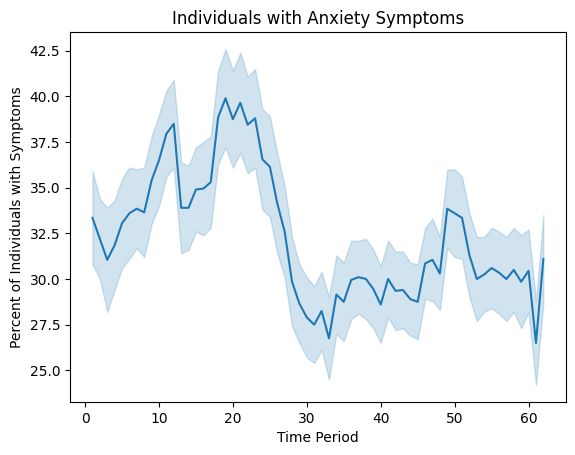

In [53]:
# Lineplot of all survey data from 04-23-2020 to 10-02-2023
# Each time period is equal to a survey period of 12 days
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Time Period', y='Value',data=anxiety_national)
plt.xlabel("Time Period")
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms")

Text(0.5, 1.0, 'Individuals with Anxiety Symptoms')

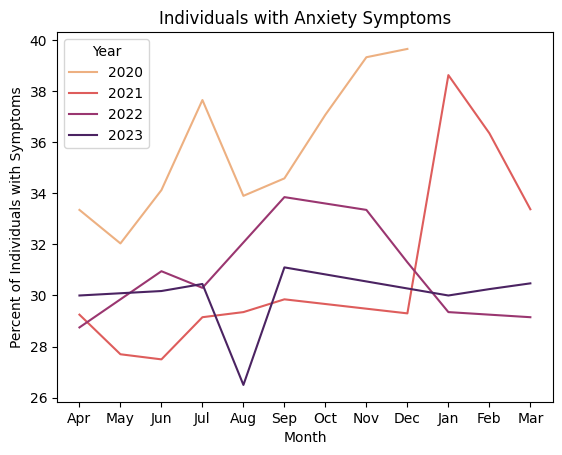

In [54]:
# Seperated by Year
# Lineplot of all survey data from 04-23-2020 to 10-02-2023
# Each time period is equal to a survey period of 12 days
import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(x='Month', y='Value',hue='Year', data=anxiety_national, errorbar=None, palette='flare')
plt.xlabel("Month")
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms")

### <span style='color:Red'>Comparing Anxiety and Depression</span>

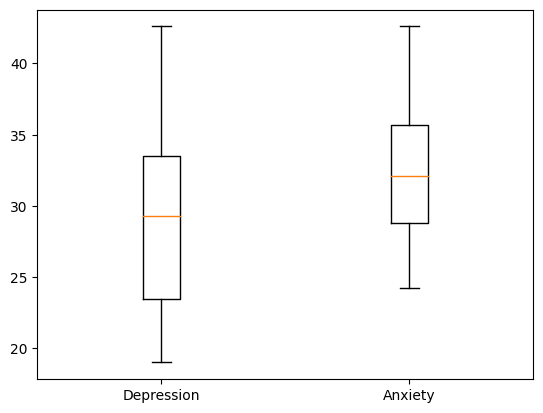

In [28]:
# Distribution of anxiety and depression national estimates 
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots()
box1 = depression_national['Value']
box2 = anxiety_national['Value']

ax.boxplot([box1, box2],
           labels=['Depression', 'Anxiety'])
plt.show()

In [56]:
depression_national.loc[:, 'Indicator'] = 'Depression'
anxiety_national.loc[:, 'Indicator'] = 'Anxiety'


combined = pd.concat([depression_national.assign(condition='Depression'), anxiety_national.assign(condition='Anxiety')])

Text(0.5, 0.98, 'Comparison of Depression and Anxiety')

<Figure size 1600x1000 with 0 Axes>

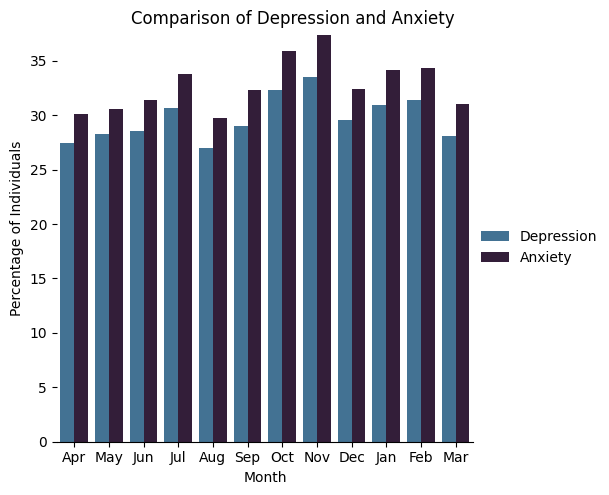

In [57]:
# Bar Chart Comparison of Depression and Anxiety
plt.figure(figsize=(16,10))

custom_colors=['#3575a1', '#35193e']

g = sns.catplot(
    data=combined, kind="bar",
    x="Month", y="Value", hue="Indicator",
    errorbar=None, palette=custom_colors,
)
g.despine(left=True)
g.set_axis_labels("Month", "Percentage of Individuals")
g.legend.set_title("")
g.fig.suptitle("Comparison of Depression and Anxiety")

## Age
***

In [58]:
depression_age = depression[depression['Group'] == 'By Age']
anxiety_age = anxiety[anxiety['Group'] == 'By Age']

### <span style='color:Red'>Depression</span>


In [59]:
# Depression
# Summary statistics per age group (all dates within the data)
depression_age.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
18 - 29 years,124.0,43.129032,7.287173,29.7,36.350,43.75,48.775,58.7
30 - 39 years,124.0,34.496774,7.211733,23.0,27.550,34.85,40.325,49.5
40 - 49 years,124.0,30.798387,6.817529,19.4,24.425,31.20,35.725,45.6
50 - 59 years,124.0,28.037097,6.278101,16.7,22.600,28.00,32.350,41.3
60 - 69 years,124.0,21.995968,5.467456,13.1,17.175,21.70,25.425,34.2
70 - 79 years,124.0,16.498387,4.616636,9.4,12.400,16.00,19.325,28.6
80 years and above,124.0,15.549194,4.436187,6.4,12.100,15.10,18.600,28.3


In [60]:
# Summary statistics per age group per year
year = depression_age['Time Period Start Date'].dt.year
depression_age.groupby(['Subgroup', year])['Value'].describe()

count       mean       std   min  \
Subgroup           Time Period Start Date                                     
18 - 29 years      2020                     42.0  44.621429  7.460025  32.7   
                   2021                     40.0  43.782500  7.024824  32.6   
                   2022                     22.0  41.890909  6.833803  32.4   
                   2023                     20.0  40.050000  7.293364  29.7   
30 - 39 years      2020                     42.0  36.585714  7.655082  25.7   
                   2021                     40.0  33.942500  6.994243  24.4   
                   2022                     22.0  33.995455  6.533611  26.7   
                   2023                     20.0  31.770000  6.650691  23.0   
40 - 49 years      2020                     42.0  33.433333  7.088179  23.8   
                   2021                     40.0  30.025000  6.484647  21.4   
                   2022                     22.0  29.713636  6.106070  22.3   
                   2023                     20.0  28.005000  6.226131  19.4   
50 - 59 years      2020                     42.0  31.140476  6.055598  22.6   
                   2021                     40.0  26.575000  6.127523  18.6   
                   2022                     22.0  27.154545  5.620263  19.4   
                   2023                     20.0  25.415000  5.487812  16.7   
60 - 69 years      2020                     42.0  24.957143  5.231152  17.6   
                   2021                     40.0  20.927500  5.411478  14.2   
                   2022                     22.0  20.081818  4.579315  13.5   
                   2023                     20.0  20.020000  4.587122  13.1   
70 - 79 years      2020                     42.0  18.990476  4.482095  12.2   
                   2021                     40.0  15.465000  4.671164   9.4   
                   2022                     22.0  14.613636  3.649305  10.1   
                   2023                     20.0  15.405000  3.710792  10.7   
80 years and above 2020                     42.0  16.783333  4.292871   9.1   
                   2021                     40.0  15.415000  4.616834   6.4   
                   2022                     22.0  13.900000  4.680456   7.0   
                   2023                     20.0  15.040000  3.583500  10.7   

                                              25%    50%     75%   max  
Subgroup           Time Period Start Date                               
18 - 29 years      2020                    36.800  45.10  49.775  58.7  
                   2021                    37.200  43.90  49.125  56.9  
                   2022                    35.350  42.20  48.175  51.7  
                   2023                    33.250  39.35  47.200  49.4  
30 - 39 years      2020                    28.650  36.35  42.875  49.5  
                   2021                    26.700  33.35  39.350  47.2  
                   2022                    27.700  34.05  40.250  41.8  
                   2023                    25.925  31.35  38.825  39.5  
40 - 49 years      2020                    26.325  33.40  39.000  45.6  
                   2021                    23.800  30.25  35.225  43.9  
                   2022                    23.675  29.65  34.925  38.1  
                   2023                    22.500  27.30  34.075  35.8  
50 - 59 years      2020                    25.200  31.40  35.800  41.1  
                   2021                    20.750  27.10  29.625  41.3  
                   2022                    22.600  27.00  31.850  37.8  
                   2023                    20.850  24.05  30.725  32.5  
60 - 69 years      2020                    19.950  24.55  29.300  34.2  
                   2021                    16.000  21.30  22.700  34.2  
                   2022                    15.900  19.30  22.900  27.9  
                   2023                    15.975  18.50  24.650  25.7  
70 - 79 years      2020                    15.425  18.35  23.025  

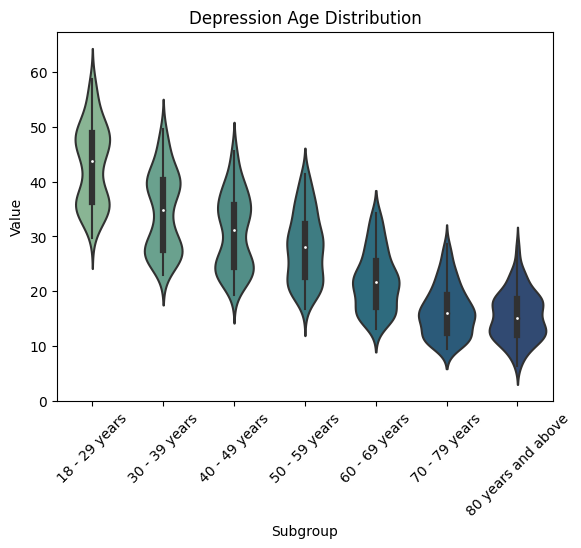

In [61]:
# Age distribution - Depression 
fig = sns.violinplot(x='Subgroup', y='Value', palette='crest', data=depression_age.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Age Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Year and by Age Group')

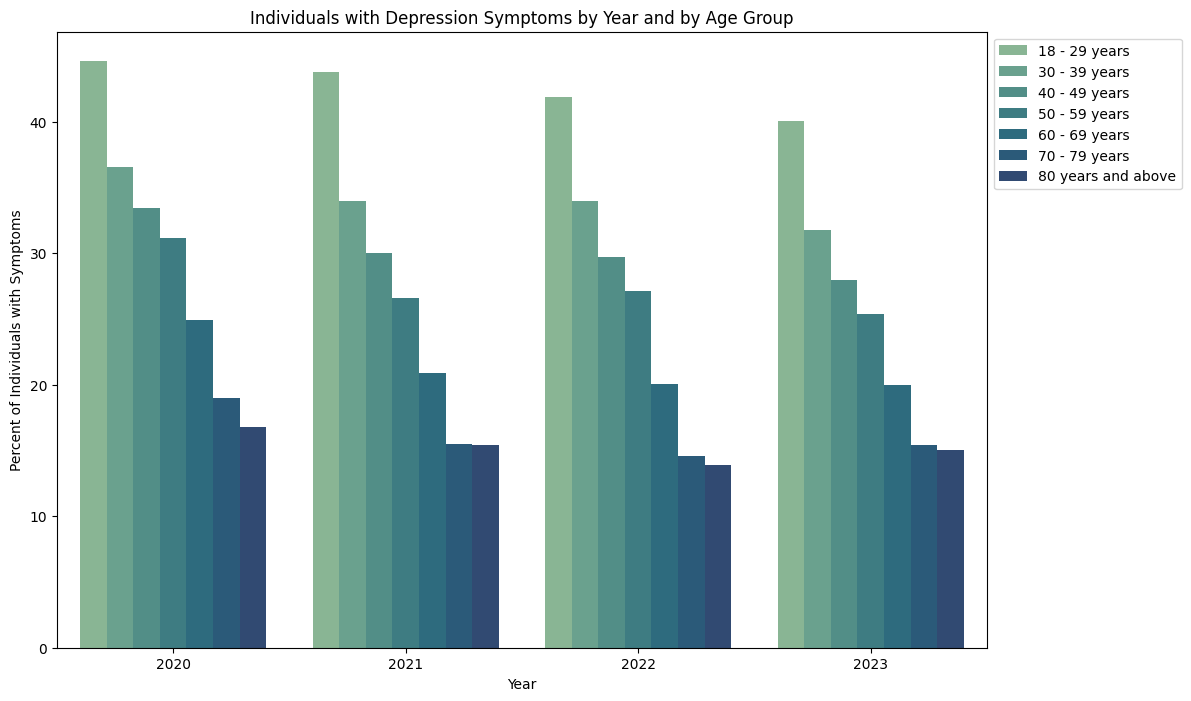

In [62]:
# Depression Barplot - by age group by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=depression_age, errorbar=None, palette='crest')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Year and by Age Group")

In [63]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each age group for each month, but only looking at the min and max month for each group

monthly_dep_anx = depression_age.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_dep_anx['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_dep_anx[monthly_dep_anx['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)

Min Values:
   Month            Subgroup    Value
7    Aug       18 - 29 years  39.9625
1    Apr       30 - 39 years  32.2800
9    Aug       40 - 49 years  28.1375
10   Aug       50 - 59 years  25.0750
11   Aug       60 - 69 years  19.5000
12   Aug       70 - 79 years  14.7125
13   Aug  80 years and above  14.0125

Max Values:
   Month            Subgroup      Value
63   Nov       18 - 29 years  47.716667
64   Nov       30 - 39 years  38.350000
65   Nov       40 - 49 years  35.783333
66   Nov       50 - 59 years  31.933333
67   Nov       60 - 69 years  25.766667
68   Nov       70 - 79 years  20.083333
69   Nov  80 years and above  19.266667


Text(0.5, 1.0, 'Average of Individuals with Depression Symptoms by Month and by Age Group')

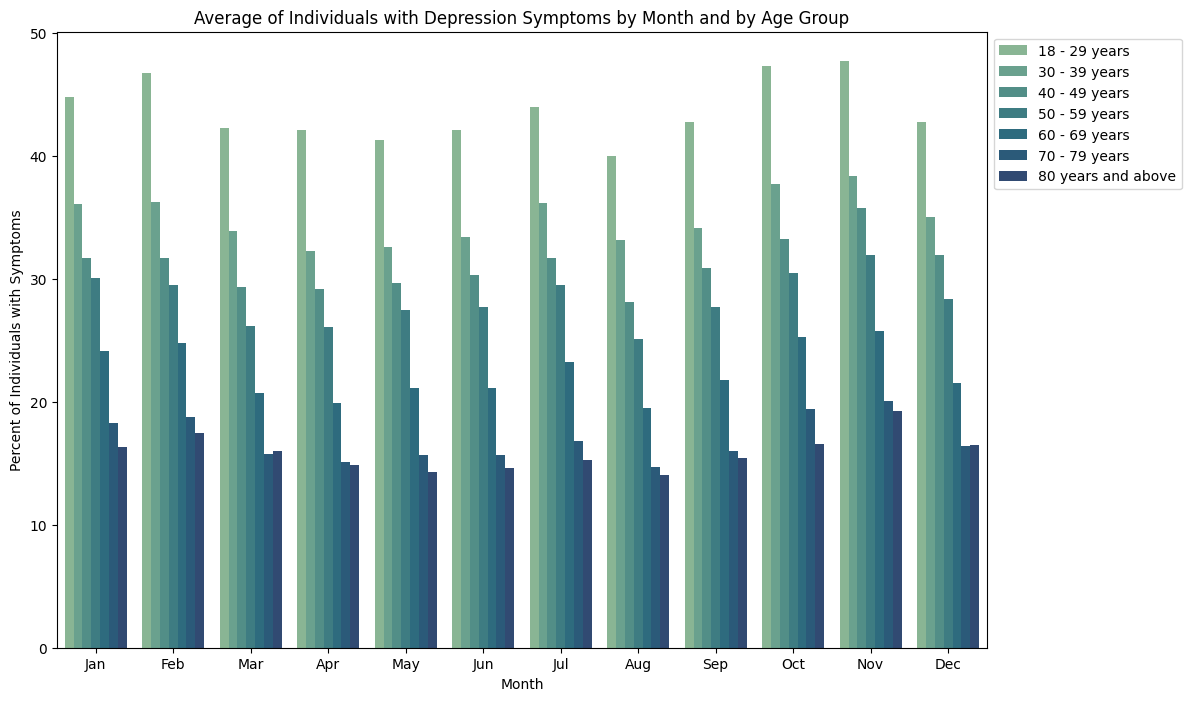

In [64]:
# Looking at average distributions for Depression by Month by age group
month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Value',hue='Subgroup', data=monthly_dep_anx, order=month_order, errorbar=None, palette='crest')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.xlabel("Month")
plt.title("Average of Individuals with Depression Symptoms by Month and by Age Group")

### <span style='color:Red'>Anxiety</span>

In [65]:
# Anxiety
# Summary statistics per age group (all dates within the data)
anxiety_age.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
18 - 29 years,124.0,46.008065,4.887841,37.3,42.075,46.45,49.025,58.7
30 - 39 years,124.0,38.655645,4.149685,30.2,35.650,38.80,40.825,49.5
40 - 49 years,124.0,34.726613,4.133408,25.9,31.700,34.35,37.725,45.6
50 - 59 years,124.0,31.076613,4.446559,22.0,27.650,30.90,34.700,41.3
60 - 69 years,124.0,24.147581,4.448978,15.8,20.875,23.50,27.400,34.2
70 - 79 years,124.0,17.812903,4.042195,10.6,15.000,17.25,20.275,28.6
80 years and above,124.0,16.566129,3.882918,7.6,13.875,16.70,18.925,28.3


In [66]:
# Summary statistics per age group per year
year = anxiety_age['Time Period Start Date'].dt.year
anxiety_age.groupby(['Subgroup', year])['Value'].describe()

count       mean       std   min  \
Subgroup           Time Period Start Date                                     
18 - 29 years      2020                     42.0  47.511905  5.183896  38.6   
                   2021                     40.0  46.065000  5.164452  37.7   
                   2022                     22.0  45.081818  3.910747  39.1   
                   2023                     20.0  43.755000  3.698716  37.3   
30 - 39 years      2020                     42.0  41.085714  4.273833  32.2   
                   2021                     40.0  37.790000  4.113754  30.2   
                   2022                     22.0  38.163636  2.421441  34.1   
                   2023                     20.0  35.825000  2.738204  31.0   
40 - 49 years      2020                     42.0  37.714286  3.792648  30.7   
                   2021                     40.0  33.682500  3.983098  27.6   
                   2022                     22.0  33.563636  2.660388  29.3   
                   2023                     20.0  31.820000  2.586524  25.9   
50 - 59 years      2020                     42.0  34.516667  3.211330  28.4   
                   2021                     40.0  29.365000  4.593002  22.9   
                   2022                     22.0  30.086364  3.477724  25.1   
                   2023                     20.0  28.365000  2.805685  22.0   
60 - 69 years      2020                     42.0  27.540476  3.270270  22.0   
                   2021                     40.0  22.712500  4.797819  16.7   
                   2022                     22.0  22.090909  3.241386  16.3   
                   2023                     20.0  22.155000  2.708559  15.8   
70 - 79 years      2020                     42.0  20.500000  3.521363  13.4   
                   2021                     40.0  16.477500  4.400611  11.4   
                   2022                     22.0  15.963636  2.683556  11.6   
                   2023                     20.0  16.875000  2.589833  10.6   
80 years and above 2020                     42.0  17.538095  3.684572  11.0   
                   2021                     40.0  16.235000  4.286266   7.6   
                   2022                     22.0  15.400000  4.221825   8.6   
                   2023                     20.0  16.470000  2.644577  11.5   

                                              25%    50%     75%   max  
Subgroup           Time Period Start Date                               
18 - 29 years      2020                    42.825  47.70  49.975  58.7  
                   2021                    42.550  45.85  49.125  56.9  
                   2022                    41.950  45.15  48.175  51.7  
                   2023                    41.125  42.85  47.200  49.4  
30 - 39 years      2020                    37.950  40.70  43.275  49.5  
                   2021                    34.875  37.30  40.125  47.2  
                   2022                    36.075  38.25  40.250  41.8  
                   2023                    34.200  35.20  38.825  39.5  
40 - 49 years      2020                    34.950  37.95  39.900  45.6  
                   2021                    31.275  33.05  35.525  43.9  
                   2022                    31.700  33.45  34.925  38.1  
                   2023                    30.000  31.05  34.075  35.8  
50 - 59 years      2020                    31.725  34.80  36.075  41.1  
                   2021                    25.800  28.60  31.600  41.3  
                   2022                    27.900  29.50  32.200  37.8  
                   2023                    26.150  28.00  30.725  32.5  
60 - 69 years      2020                    25.050  27.40  29.450  34.2  
                   2021                    18.850  22.10  23.850  34.2  
                   2022                    19.450  22.35  23.675  27.9  
                   2023                    20.175  21.55  24.650  25.7  
70 - 79 years      2020                    18.200  19.65  23.100  

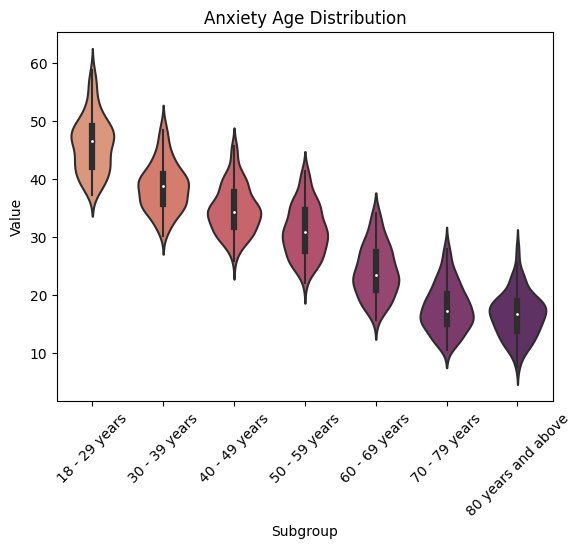

In [67]:
# Anxiety Age Distribution 
fig = sns.violinplot(x='Subgroup', y='Value', palette='flare', data=anxiety_age.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Anxiety Age Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Year and by Age Group')

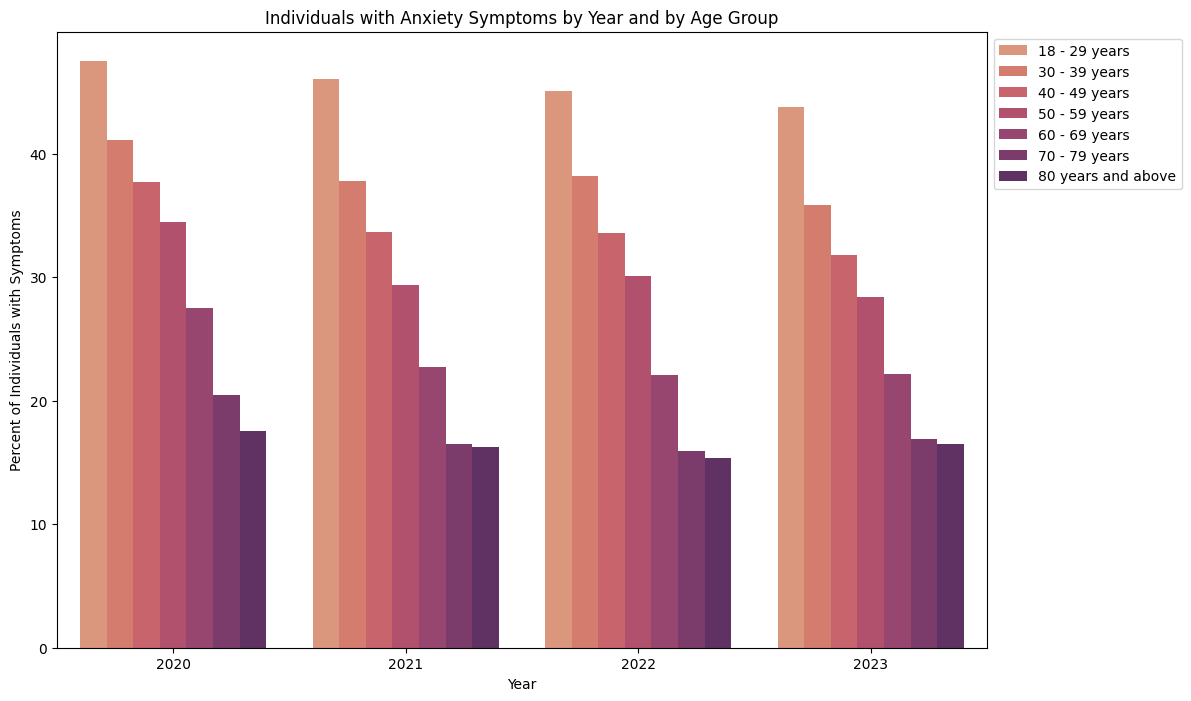

In [68]:
# Anxiety Barplot - by age group by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=anxiety_age, errorbar=None, palette='flare')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Year and by Age Group")

In [69]:
# Anxiety
# Looking at monthly distributions. Here we are finding the mean of each age group for each month, but only looking at the min and max month for each group

monthly_age_anx = anxiety_age.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_age_anx['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_age_anx[monthly_age_anx['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
   Month            Subgroup    Value
7    Aug       18 - 29 years  42.7875
1    Apr       30 - 39 years  36.0100
9    Aug       40 - 49 years  31.8500
10   Aug       50 - 59 years  28.0750
11   Aug       60 - 69 years  21.1625
12   Aug       70 - 79 years  15.6500
62   May  80 years and above  14.4750

Max Values:
   Month            Subgroup      Value
63   Nov       18 - 29 years  51.250000
64   Nov       30 - 39 years  43.300000
65   Nov       40 - 49 years  40.666667
66   Nov       50 - 59 years  35.750000
67   Nov       60 - 69 years  29.116667
68   Nov       70 - 79 years  22.700000
69   Nov  80 years and above  19.516667


Text(0.5, 1.0, 'Average of Individuals with Anxiety Symptoms by Month and by Age Group')

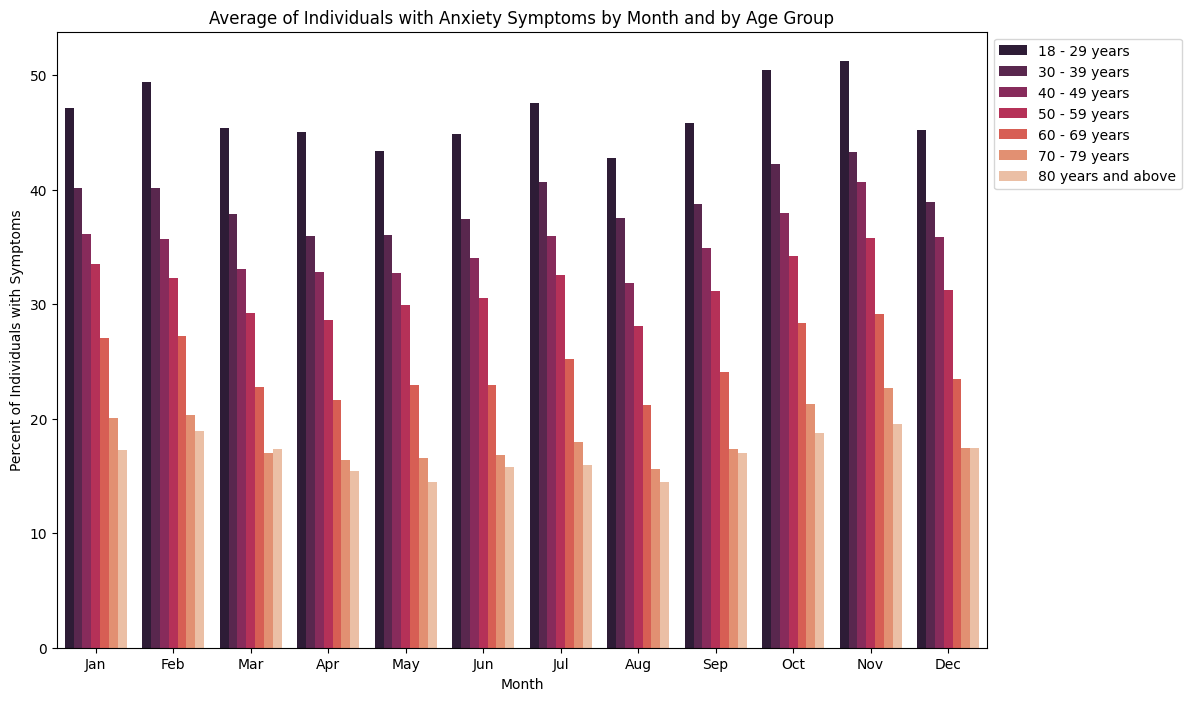

In [70]:
# Looking at average distributions for Anxiety by Month by age group
month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Value',hue='Subgroup', data=monthly_age_anx, order=month_order, errorbar=None, palette='rocket')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.xlabel("Month")
plt.title("Average of Individuals with Anxiety Symptoms by Month and by Age Group")

### <span style='color:Red'>Comparing Anxiety and Depression</span>


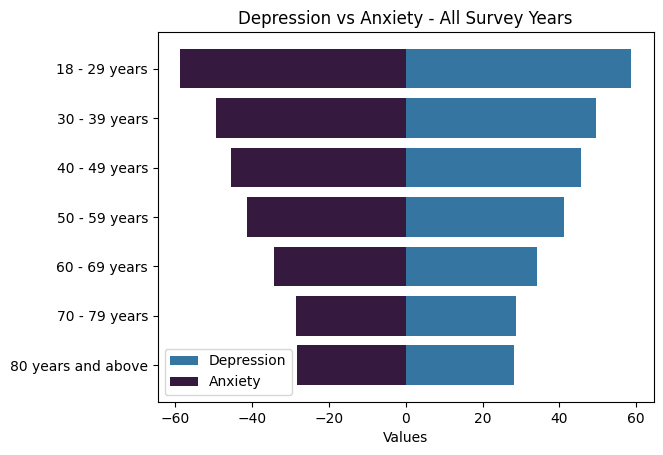

In [71]:
# Depression vs Anxiety - all years
categories = depression_age['Subgroup']
d1 = depression_age['Value']
d2 = anxiety_age['Value']

fig, ax = plt.subplots()

# Plot left side
ax.barh(categories, d1, color='#3575a1', label='Depression')

# Plot right side
ax.barh(categories, [-x for x in d2], color='#35193e', label='Anxiety')

# Add labels and title
ax.set_xlabel('Values')
ax.set_title('Depression vs Anxiety - All Survey Years')
ax.invert_yaxis()

# Show legend
ax.legend()

# Show the plot
plt.show()

## Sex
***

In [72]:
dep_sex = depression[depression['Group'] == 'By Sex']
anx_sex = anxiety[anxiety['Group'] == 'By Sex']

### <span style='color:Red'>Depression</span>


In [73]:
# Depression
# Summary statistics per age group (all dates within the data)
dep_sex.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Female,124.0,31.849194,7.187947,19.8,24.90,31.85,36.775,47.6
Male,124.0,26.636290,5.219169,18.2,21.75,26.65,29.925,38.0


In [74]:
# Depression
# Summary statistics per sex per year
yr = dep_sex['Time Period Start Date'].dt.year
dep_sex.groupby(['Subgroup', yr])['Value'].describe()

count       mean       std   min     25%  \
Subgroup Time Period Start Date                                             
Female   2020                     42.0  34.952381  7.270966  25.8  27.500   
         2021                     40.0  30.992500  6.827636  22.4  23.750   
         2022                     22.0  30.209091  6.310679  22.9  24.125   
         2023                     20.0  28.850000  6.728533  19.8  22.500   
Male     2020                     42.0  28.873810  5.246465  20.8  23.700   
         2021                     40.0  25.727500  5.200640  18.4  20.700   
         2022                     22.0  25.663636  4.650401  19.9  20.975   
         2023                     20.0  24.825000  4.491146  18.2  21.075   

                                   50%     75%   max  
Subgroup Time Period Start Date                       
Female   2020                    34.75  41.150  47.6  
         2021                    31.50  35.300  45.4  
         2022                    30.00  35.725  38.5  
         2023                    27.50  35.550  36.7  
Male     2020                    28.90  32.700  37.9  
         2021                    26.45  28.000  38.0  
         2022                    25.70  29.400  33.4  
         2023                    23.95  29.200  30.5

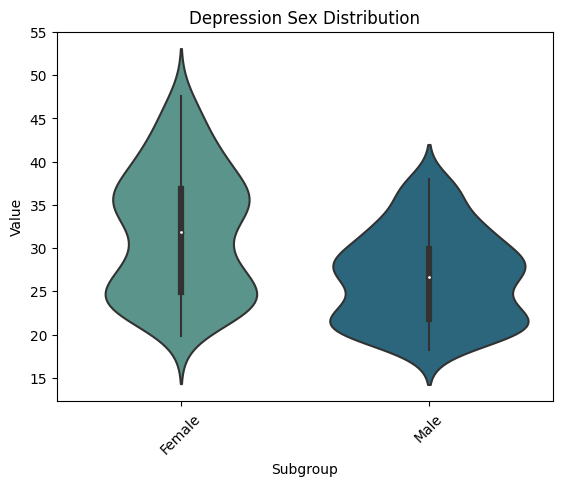

In [75]:
# Depression
# Depression distribution for both sexes
fig = sns.violinplot(x='Subgroup', y='Value', palette='crest', data=dep_sex.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Sex Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Year and by Age Group')

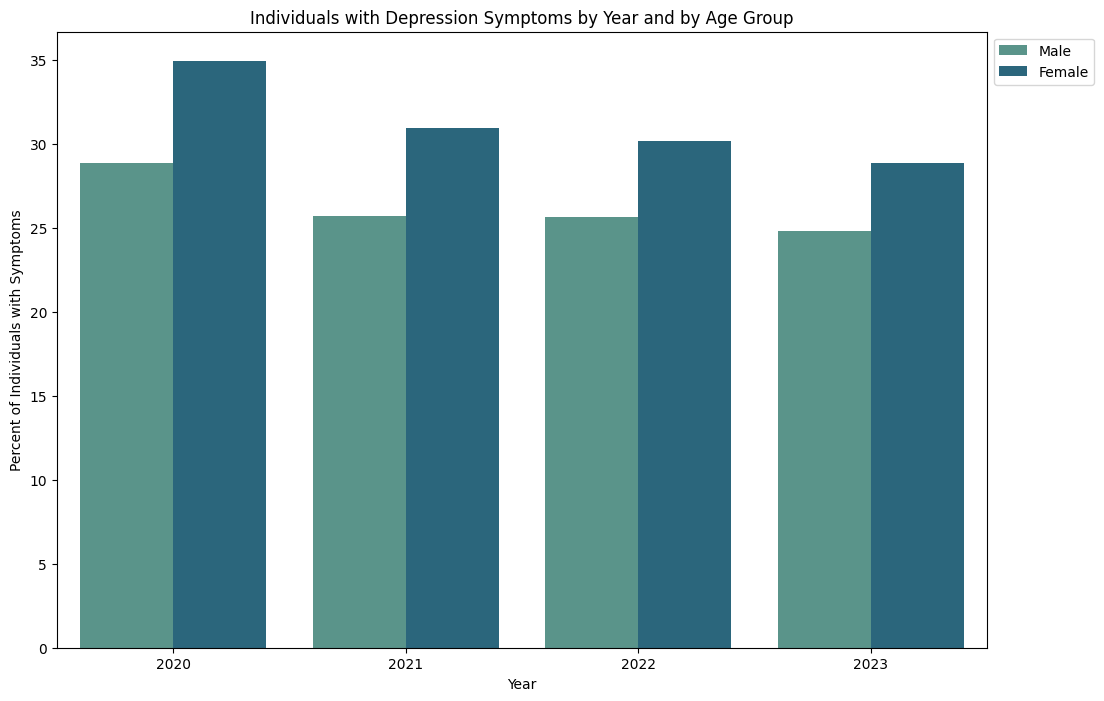

In [76]:
# Depression Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=dep_sex, errorbar=None, palette='crest')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Year and by Sex")

In [77]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_dep_sex = dep_sex.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_dep_sex['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_dep_sex[monthly_dep_sex['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
  Month Subgroup    Value
2   Aug   Female  29.4875
3   Aug     Male  24.2750

Max Values:
   Month Subgroup      Value
18   Nov   Female  36.416667
19   Nov     Male  30.350000


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Month and by Sex')

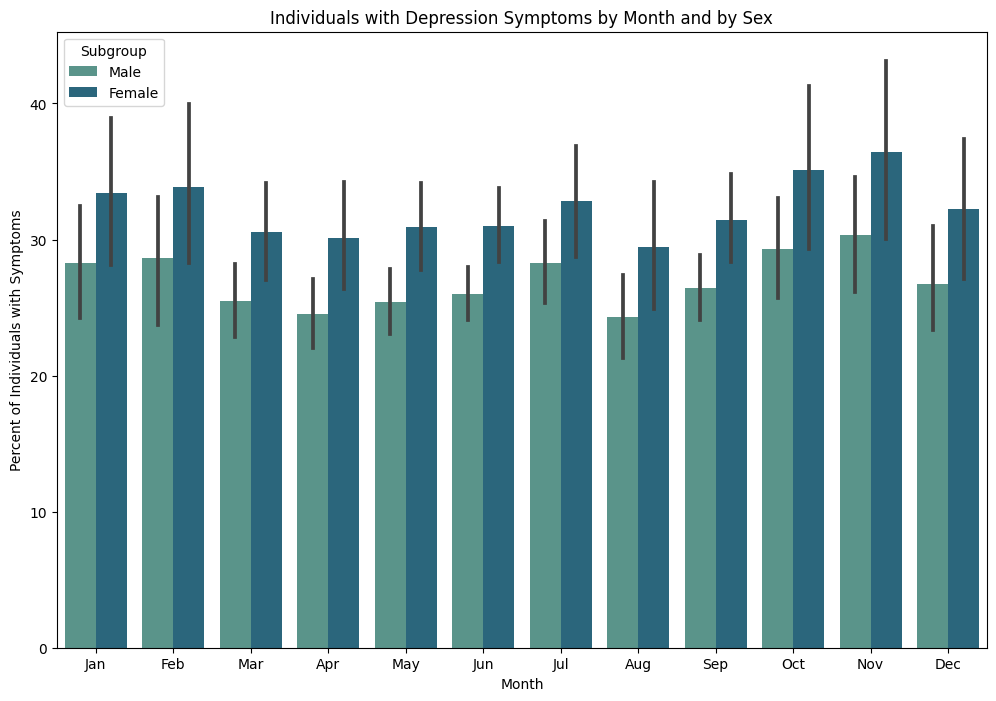

In [78]:
# Depression
plt.figure(figsize=(12, 8))

sns.barplot(x='Month', y='Value', hue='Subgroup', data=dep_sex, order=month_order, palette='crest')
plt.xlabel("Month")
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Month and by Sex")

### <span style='color:Red'>Anxiety</span>


In [79]:
#Anxiety
# Summary statistics per age group (all dates within the data)
anx_sex.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Female,124.0,35.934677,4.386714,27.2,32.575,35.35,38.650,47.6
Male,124.0,28.420161,4.096379,20.2,24.700,28.05,31.175,38.0


In [80]:
# Anxiety
# Summary statistics per sex per year
yr = anx_sex['Time Period Start Date'].dt.year
anx_sex.groupby(['Subgroup', yr])['Value'].describe()

count       mean       std   min     25%  \
Subgroup Time Period Start Date                                             
Female   2020                     42.0  39.311905  3.818645  32.1  36.475   
         2021                     40.0  34.602500  4.415618  28.5  31.375   
         2022                     22.0  34.340909  2.532392  30.4  32.650   
         2023                     20.0  33.260000  2.564823  27.2  31.475   
Male     2020                     42.0  30.969048  3.575901  24.2  27.800   
         2021                     40.0  27.275000  4.347103  20.2  23.550   
         2022                     22.0  27.395455  3.260803  22.8  24.750   
         2023                     20.0  26.485000  2.866370  21.1  24.250   

                                   50%     75%   max  
Subgroup Time Period Start Date                       
Female   2020                    39.60  41.475  47.6  
         2021                    33.95  36.425  45.4  
         2022                    34.35  35.725  38.5  
         2023                    32.60  35.550  36.7  
Male     2020                    31.25  32.700  37.9  
         2021                    27.40  29.000  38.0  
         2022                    27.55  29.400  33.4  
         2023                    25.40  29.200  30.5

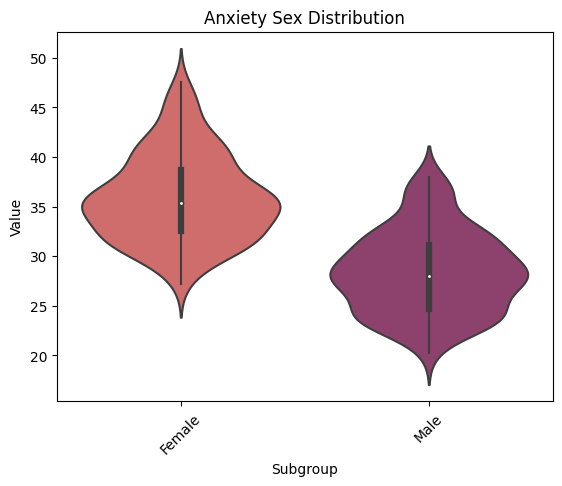

In [81]:
# Anxiety
# Anxiety distribution for both sexes
fig = sns.violinplot(x='Subgroup', y='Value', palette='flare', data=anx_sex.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Anxiety Sex Distribution")
plt.show()

Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Year and by Age Group')

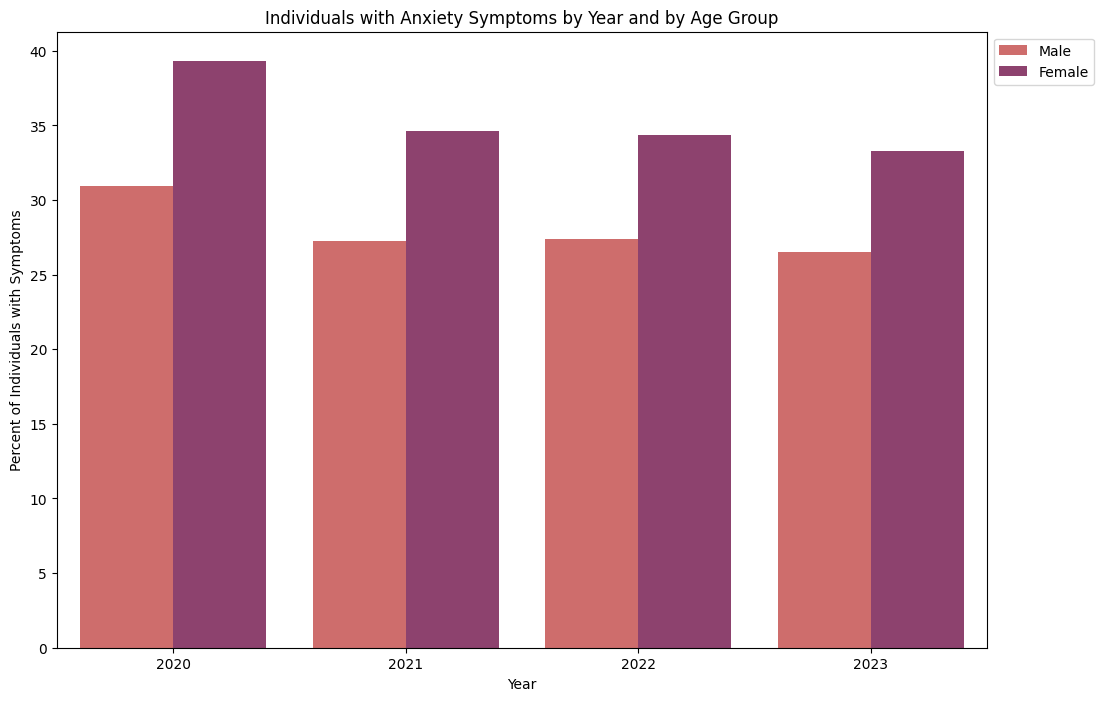

In [82]:
# Anxiety Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=anx_sex, errorbar=None, palette='flare')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Year and by Sex")

In [83]:
# Anxiety
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_anx_sex = anx_sex.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_anx_sex['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_anx_sex[monthly_anx_sex['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
  Month Subgroup    Value
2   Aug   Female  33.5125
3   Aug     Male  25.8125

Max Values:
   Month Subgroup      Value
18   Nov   Female  41.666667
19   Nov     Male  32.733333


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Month and by Sex')

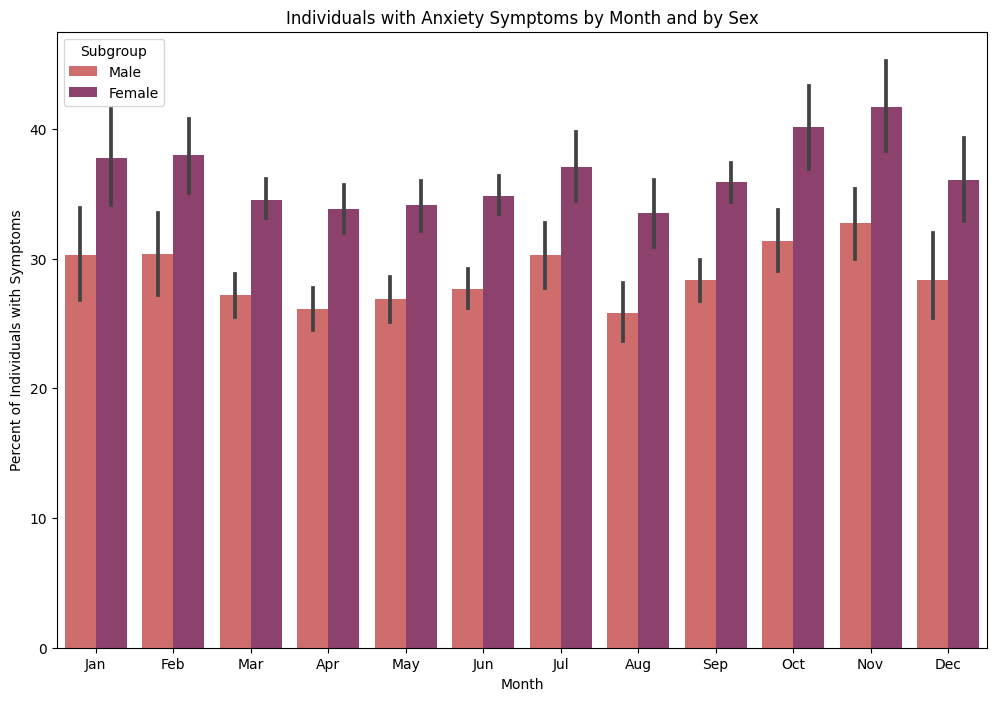

In [84]:
# Anxiety monthly distribution - barplot
plt.figure(figsize=(12, 8))

sns.barplot(x='Month', y='Value', hue='Subgroup', data=anx_sex, order=month_order, palette='flare')
plt.xlabel("Month")
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Month and by Sex")

### <span style='color:Red'> Comparision of Both Depression and Anxiety</span>

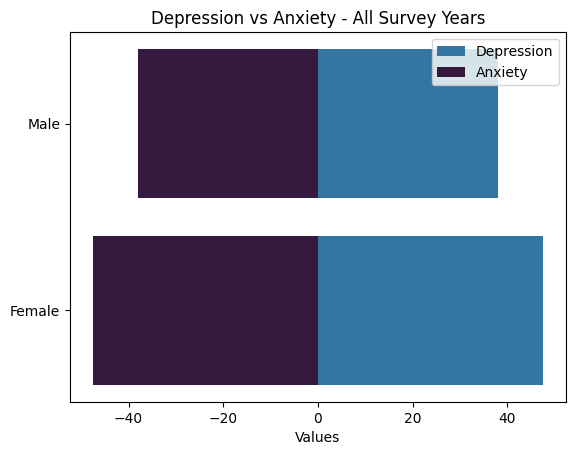

In [85]:
# Depression vs Anxiety - all years
categories = dep_sex['Subgroup']
d1 = dep_sex['Value']
d2 = anx_sex['Value']

fig, ax = plt.subplots()

# Plot left side
ax.barh(categories, d1, color='#3575a1', label='Depression')

# Plot right side
ax.barh(categories, [-x for x in d2], color='#35193e', label='Anxiety')

# Add labels and title
ax.set_xlabel('Values')
ax.set_title('Depression vs Anxiety - All Survey Years')
ax.invert_yaxis()

# Show legend
ax.legend()

# Show the plot
plt.show()

## Race
***

In [86]:
dep_race = depression[depression['Group'] == 'By Race/Hispanic ethnicity']
anx_race = anxiety[anxiety['Group'] == 'By Race/Hispanic ethnicity']

### <span style='color:Red'>Depression</span>

In [87]:
# Depression
# Summary statistics per race (all dates within the data)
dep_race.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Asian,124.0,23.458065,6.036153,13.8,18.500,23.20,26.600,40.3
Black,124.0,31.317742,6.487474,19.5,25.750,31.25,35.250,48.0
Hispanic or Latino,124.0,33.452419,6.742505,20.6,27.875,33.30,37.925,48.2
Other and Multiple Races,124.0,38.117742,7.010701,25.1,32.050,37.85,43.925,52.6
White,124.0,27.912903,6.149201,18.2,22.050,27.70,32.225,41.2


In [88]:
# Depression
# Summary statistics per race per year
yr = dep_race['Time Period Start Date'].dt.year
dep_race.groupby(['Subgroup', yr])['Value'].describe()

count       mean       std  \
Subgroup                 Time Period Start Date                               
Asian                    2020                     42.0  27.035714  5.753422   
                         2021                     40.0  23.065000  5.967242   
                         2022                     22.0  20.259091  4.435319   
                         2023                     20.0  20.250000  4.278404   
Black                    2020                     42.0  34.961905  6.278416   
                         2021                     40.0  30.712500  6.149805   
                         2022                     22.0  29.013636  5.129680   
                         2023                     20.0  27.410000  5.323226   
Hispanic or Latino       2020                     42.0  36.859524  6.799177   
                         2021                     40.0  32.585000  6.129105   
                         2022                     22.0  31.454545  5.914609   
                         2023                     20.0  30.230000  5.997903   
Other and Multiple Races 2020                     42.0  40.219048  7.420974   
                         2021                     40.0  37.877500  6.168177   
                         2022                     22.0  37.540909  6.810892   
                         2023                     20.0  34.820000  6.947139   
White                    2020                     42.0  30.211905  6.243561   
                         2021                     40.0  26.977500  6.102101   
                         2022                     22.0  26.990909  5.495965   
                         2023                     20.0  25.970000  5.689334   

                                                  min     25%    50%     75%  \
Subgroup                 Time Period Start Date                                
Asian                    2020                    19.0  21.575  27.50  30.500   
                         2021                    15.1  18.300  23.35  25.275   
                         2022                    14.0  17.175  19.85  23.450   
                         2023                    13.8  16.500  20.30  23.275   
Black                    2020                    24.8  29.300  35.40  39.950   
                         2021                    21.9  24.775  31.15  34.325   
                         2022                    21.8  24.375  28.55  33.575   
                         2023                    19.5  23.275  26.50  32.125   
Hispanic or Latino       2020                    26.3  31.000  36.25  42.600   
                         2021                    22.7  26.800  32.65  36.200   
                         2022                    23.5  25.925  31.30  36.200   
                         2023                    20.6  24.725  29.55  35.825   
Other and Multiple Races 2020                    27.1  33.675  38.05  47.775   
                         2021                    28.7  32.275  38.35  41.925   
                         2022                    26.4  31.350  36.95  44.150   
                         2023                    25.1  28.475  34.50  41.900   
White                    2020                    21.4  23.925  30.05  35.550   
                         2021                    18.6  21.100  27.15  30.450   
                         2022                    20.6  21.750  26.90  31.500   
                         2023                    18.2  20.875  24.75  31.575   

                                                  max  
Subgroup                 Time Period Start Date        
Asian                    2020                    40.3  
                         2021                    37.4  
                         2022                    29.7  
                         2023                    26.5  
Black                    2020                    48.0  
                         2021                    44.5  
                         2022                    37.3  
                         2023                

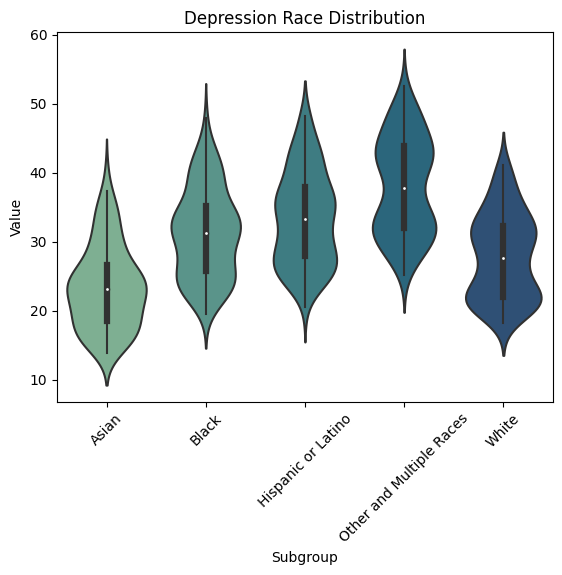

In [89]:
# Depression
# Depression distribution for both sexes
fig = sns.violinplot(x='Subgroup', y='Value', palette='crest', data=dep_race.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Race Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Year and by Race')

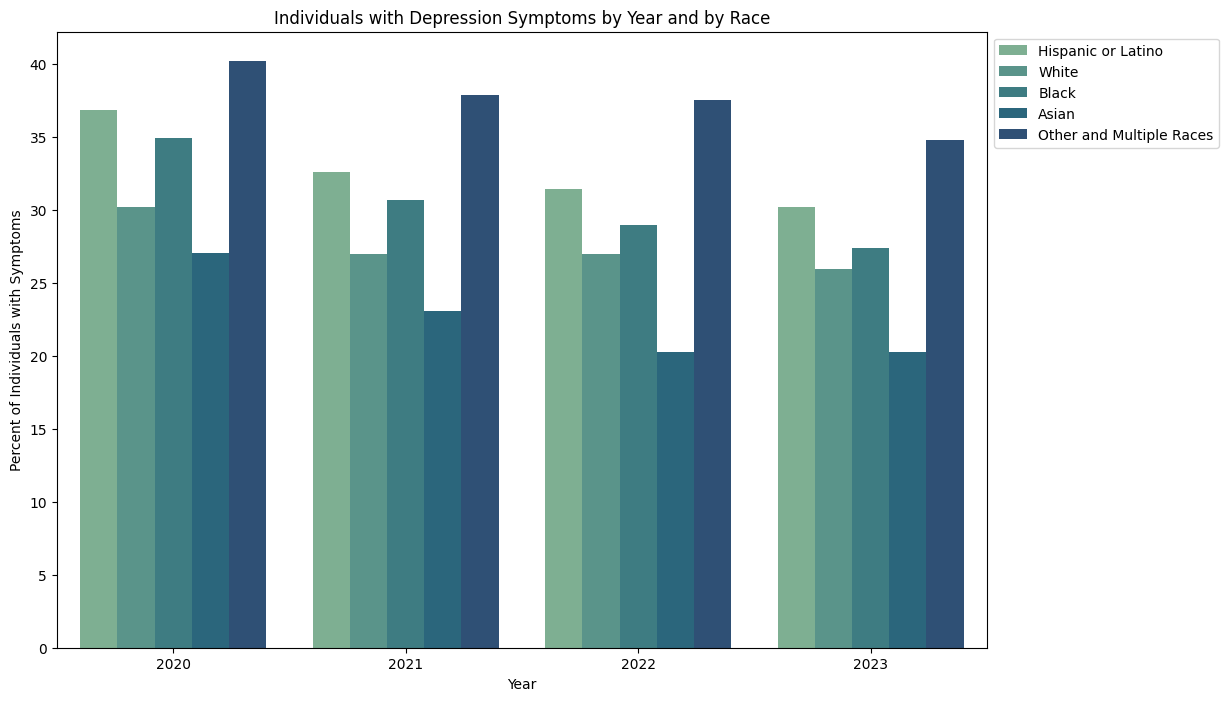

In [90]:
# Depression Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=dep_race, errorbar=None, palette='crest')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Year and by Race")

In [91]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_dep_race = dep_race.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_dep_race['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_dep_race[monthly_dep_race['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
  Month                  Subgroup    Value
5   Aug                     Asian  21.0000
6   Aug                     Black  28.1500
7   Aug        Hispanic or Latino  30.3625
3   Apr  Other and Multiple Races  35.4200
9   Aug                     White  25.8750

Max Values:
   Month                  Subgroup      Value
45   Nov                     Asian  27.100000
51   Oct                     Black  35.016667
47   Nov        Hispanic or Latino  38.833333
48   Nov  Other and Multiple Races  42.366667
49   Nov                     White  31.933333


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Month and by Race')

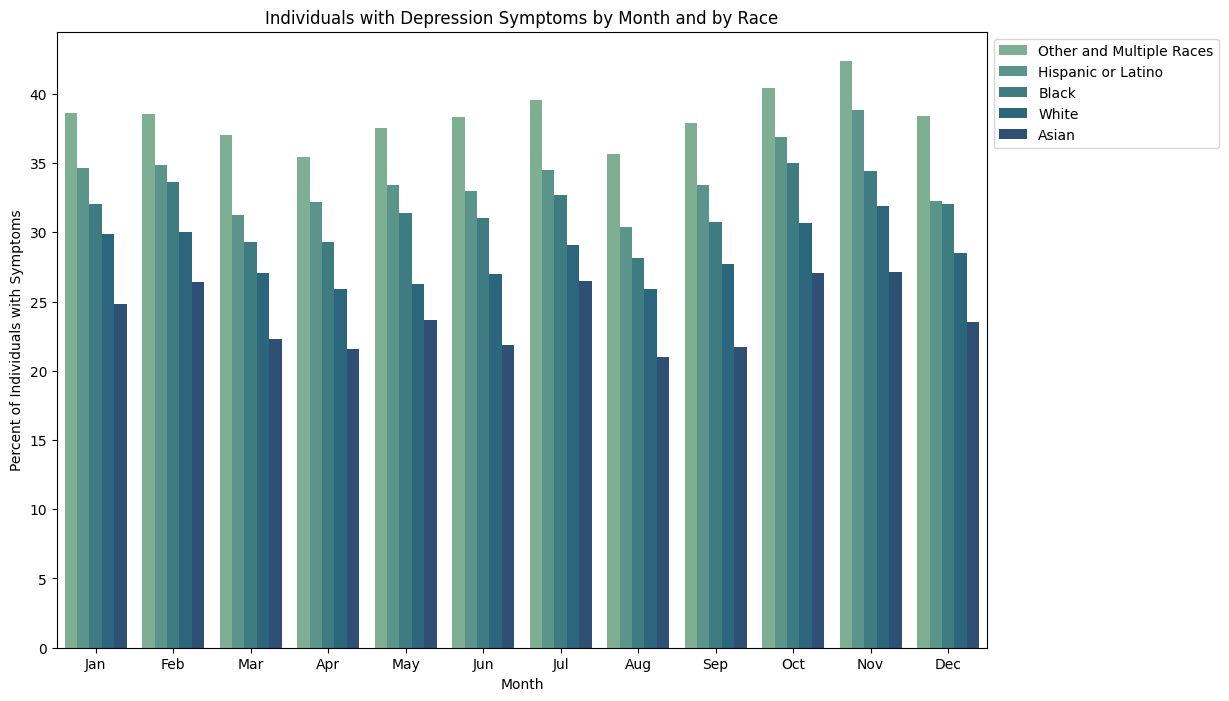

In [92]:
# Depression
plt.figure(figsize=(12, 8))

avg_values = dep_race.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=dep_race, order=month_order, hue_order=avg_values, errorbar=None, palette='crest')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Month and by Race")

### <span style='color:Red'>Anxiety</span>


In [93]:
# Anxiety
# Summary statistics per race (all dates within the data)
anx_race.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Asian,124.0,25.015323,5.384652,16.2,20.275,24.30,28.750,40.3
Black,124.0,33.598387,5.013040,22.4,29.675,33.00,36.975,48.0
Hispanic or Latino,124.0,36.345968,4.901458,26.1,32.100,35.95,39.650,48.2
Other and Multiple Races,124.0,41.504032,4.504964,31.3,37.975,41.70,44.525,52.6
White,124.0,31.108871,4.013210,22.7,27.875,30.90,34.025,41.2


In [94]:
# Anxiety
# Summary statistics per race per year
yr = anx_race['Time Period Start Date'].dt.year
anx_race.groupby(['Subgroup', yr])['Value'].describe()

count       mean       std  \
Subgroup                 Time Period Start Date                               
Asian                    2020                     42.0  29.164286  4.211298   
                         2021                     40.0  24.232500  5.442350   
                         2022                     22.0  21.736364  3.593320   
                         2023                     20.0  21.475000  3.062313   
Black                    2020                     42.0  37.464286  4.131073   
                         2021                     40.0  32.820000  4.662683   
                         2022                     22.0  31.300000  3.208619   
                         2023                     20.0  29.565000  3.507627   
Hispanic or Latino       2020                     42.0  40.121429  4.217185   
                         2021                     40.0  35.140000  4.466387   
                         2022                     22.0  34.290909  3.622274   
                         2023                     20.0  33.090000  3.328489   
Other and Multiple Races 2020                     42.0  44.071429  4.540994   
                         2021                     40.0  40.320000  4.221994   
                         2022                     22.0  41.409091  3.347196   
                         2023                     20.0  38.585000  3.377990   
White                    2020                     42.0  33.661905  3.604736   
                         2021                     40.0  29.827500  4.408790   
                         2022                     22.0  30.163636  2.708109   
                         2023                     20.0  29.350000  2.462669   

                                                  min     25%    50%     75%  \
Subgroup                 Time Period Start Date                                
Asian                    2020                    21.5  26.300  29.20  31.550   
                         2021                    16.2  20.075  23.35  27.300   
                         2022                    16.6  19.175  21.40  24.075   
                         2023                    17.1  18.650  21.80  23.275   
Black                    2020                    30.2  33.850  37.55  40.000   
                         2021                    25.6  29.250  32.70  34.850   
                         2022                    25.7  28.525  31.35  33.725   
                         2023                    22.4  27.275  29.65  32.125   
Hispanic or Latino       2020                    32.1  36.425  40.50  42.600   
                         2021                    27.6  31.525  35.30  37.100   
                         2022                    29.1  31.525  34.20  37.075   
                         2023                    26.1  30.500  32.40  35.825   
Other and Multiple Races 2020                    31.3  40.725  44.40  47.775   
                         2021                    33.8  36.450  40.40  42.800   
                         2022                    35.3  38.600  41.90  44.150   
                         2023                    33.2  36.075  38.50  41.900   
White                    2020                    26.3  31.325  34.05  35.800   
                         2021                    22.7  26.550  29.25  31.725   
                         2022                    26.2  27.925  30.45  31.500   
                         2023                    24.0  27.725  28.40  31.575   

                                                  max  
Subgroup                 Time Period Start Date        
Asian                    2020                    40.3  
                         2021                    37.4  
                         2022                    29.7  
                         2023                    26.5  
Black                    2020                    48.0  
                         2021                    44.5  
                         2022                    37.3  
                         2023                

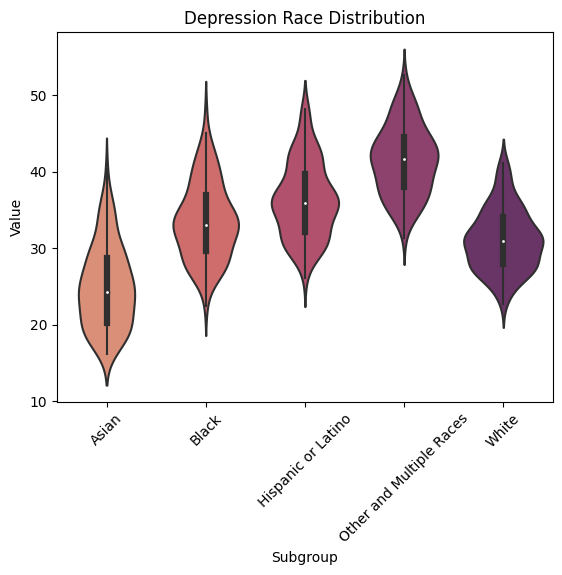

In [95]:
# Anxiety
# Depression distribution for all races
fig = sns.violinplot(x='Subgroup', y='Value', palette='flare', data=anx_race.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Race Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Year and by Race')

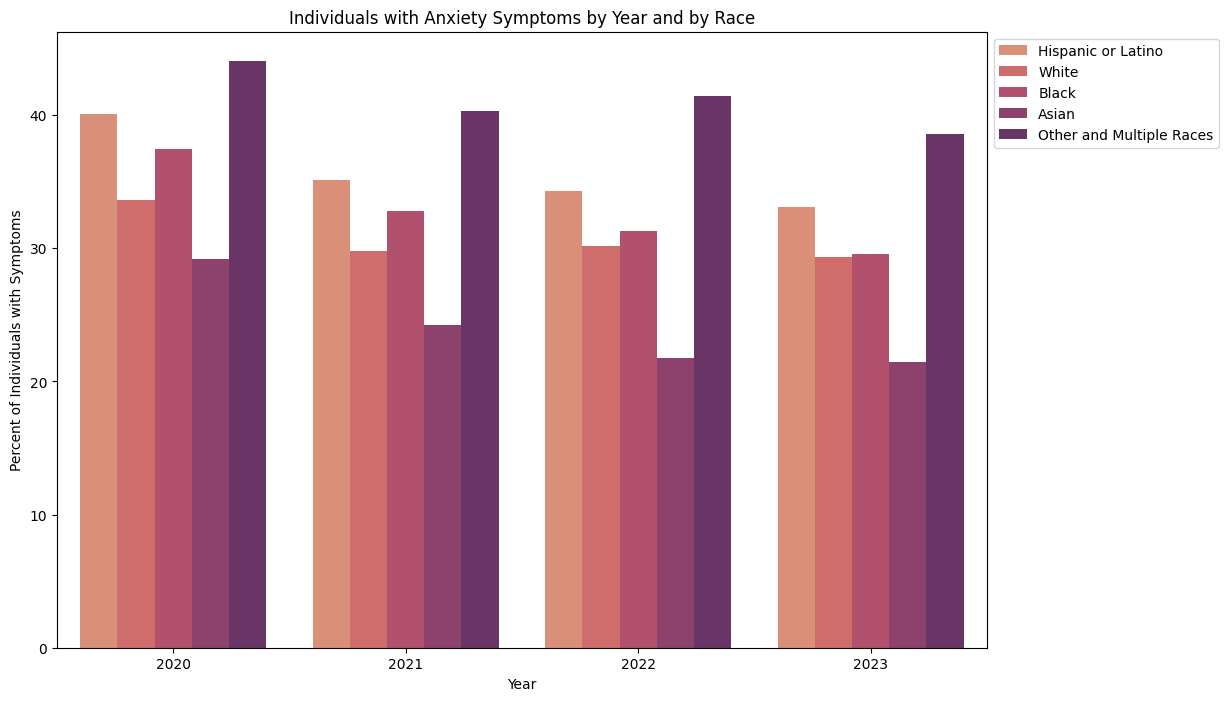

In [96]:
# Anxiety Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=anx_race, errorbar=None, palette='flare')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Year and by Race")

In [97]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_anx_race = anx_race.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_anx_race['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_anx_race[monthly_anx_race['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
   Month                  Subgroup    Value
5    Aug                     Asian  22.1500
6    Aug                     Black  30.1375
7    Aug        Hispanic or Latino  33.0000
3    Apr  Other and Multiple Races  38.5500
44   May                     White  28.6000

Max Values:
   Month                  Subgroup      Value
50   Oct                     Asian  29.933333
51   Oct                     Black  37.283333
47   Nov        Hispanic or Latino  43.416667
48   Nov  Other and Multiple Races  47.216667
49   Nov                     White  35.966667


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Month and by Race')

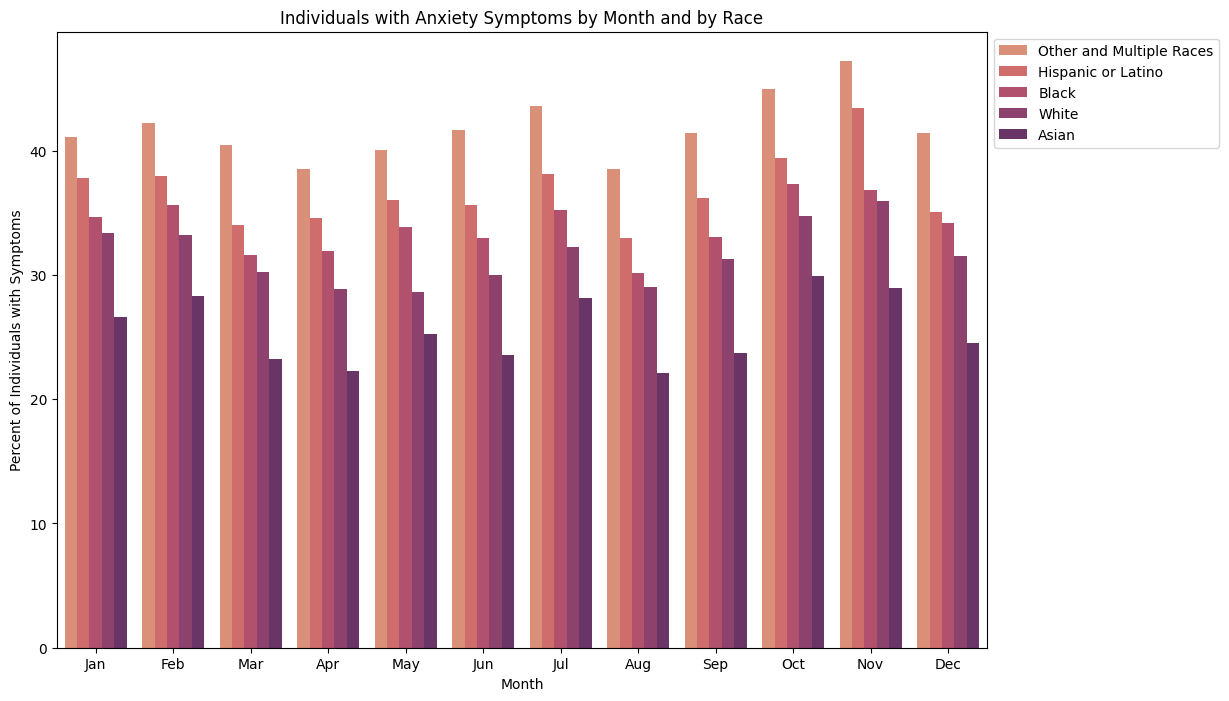

In [98]:
# Anxiety
plt.figure(figsize=(12, 8))

avg_values = anx_race.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=anx_race, order=month_order, hue_order=avg_values, errorbar=None, palette='flare')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Month and by Race")

### <span style='color:Red'>Comparing Anxiety and Depression</span>


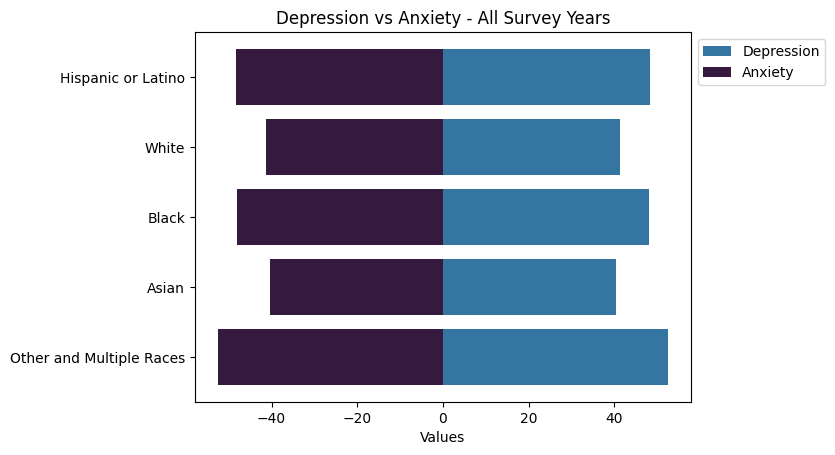

In [99]:
# Depression vs Anxiety - all years
categories = dep_race['Subgroup']
d1 = dep_race['Value']
d2 = anx_race['Value']

fig, ax = plt.subplots()

# Plot left side
ax.barh(categories, d1, color='#3575a1', label='Depression')

# Plot right side
ax.barh(categories, [-x for x in d2], color='#35193e', label='Anxiety')

# Add labels and title
ax.set_xlabel('Values')
ax.set_title('Depression vs Anxiety - All Survey Years')
ax.invert_yaxis()

# Show legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## Education
***

In [100]:
dep_edu = depression[depression['Group'] == 'By Education']
anx_edu = anxiety[anxiety['Group'] == 'By Education']

### <span style='color:Red'>Depression</span>

In [101]:
# Depression
# Summary statistics per education level (all dates within the data)
dep_edu.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Bachelor's degree or higher,124.0,22.675000,6.636063,13.0,16.275,22.10,27.175,37.5
High school diploma or GED,124.0,31.141935,5.704371,21.7,25.700,30.70,35.825,44.7
Less than a high school diploma,124.0,36.811290,6.713779,22.0,31.475,36.70,41.800,53.0
Some college/Associate's degree,124.0,33.043548,6.383697,21.8,27.050,33.05,37.600,46.4


In [102]:
# Depression
# Summary statistics per race per year
yr = dep_edu['Time Period Start Date'].dt.year
dep_edu.groupby(['Subgroup', yr])['Value'].describe()

count       mean  \
Subgroup                        Time Period Start Date                     
Bachelor's degree or higher     2020                     42.0  25.697619   
                                2021                     40.0  22.230000   
                                2022                     22.0  20.731818   
                                2023                     20.0  19.355000   
High school diploma or GED      2020                     42.0  33.514286   
                                2021                     40.0  29.797500   
                                2022                     22.0  30.100000   
                                2023                     20.0  29.995000   
Less than a high school diploma 2020                     42.0  40.178571   
                                2021                     40.0  35.757500   
                                2022                     22.0  34.486364   
                                2023                     20.0  34.405000   
Some college/Associate's degree 2020                     42.0  35.104762   
                                2021                     40.0  32.190000   
                                2022                     22.0  32.490909   
                                2023                     20.0  31.030000   

                                                             std   min  \
Subgroup                        Time Period Start Date                   
Bachelor's degree or higher     2020                    6.874005  17.2   
                                2021                    6.394918  13.4   
                                2022                    5.478128  14.7   
                                2023                    5.424067  13.0   
High school diploma or GED      2020                    5.759809  25.4   
                                2021                    5.358554  22.7   
                                2022                    5.360970  22.9   
                                2023                    5.428722  21.7   
Less than a high school diploma 2020                    6.420871  29.1   
                                2021                    6.430691  23.3   
                                2022                    6.235482  22.0   
                                2023                    5.934775  24.8   
Some college/Associate's degree 2020                    6.441063  25.6   
                                2021                    6.357664  23.6   
                                2022                    5.850674  25.7   
                                2023                    6.159554  21.8   

                                                           25%    50%     75%  \
Subgroup                        Time Period Start Date                          
Bachelor's degree or higher     2020                    19.175  24.30  31.775   
                                2021                    16.075  21.65  26.100   
                                2022                    15.375  20.85  25.825   
                                2023                    14.300  18.95  24.500   
High school diploma or GED      2020                    27.800  34.55  37.550   
                                2021                    24.800  30.20  32.825   
                                2022                    25.425  30.25  34.625   
                                2023                    25.375  28.45  35.200   
Less than a high school diploma 2020                    34.500  41.10  44.675   
                                2021                    32.075  35.30  39.900   
                                2022                    30.250  33.45  39.375   
                                2023                    29.775  32.55  40.000   
Some college/Associate's degree 2020                    28.700  34.95  39.625   
                                2021                    25.775  32.70  35.900   
                                2022                    27

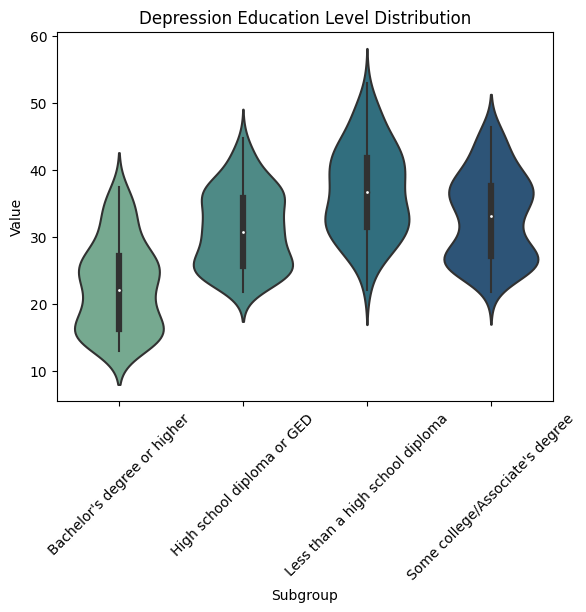

In [103]:
# Depression
# Depression distribution for education
fig = sns.violinplot(x='Subgroup', y='Value', palette='crest', data=dep_edu.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Education Level Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Year and by Education Level')

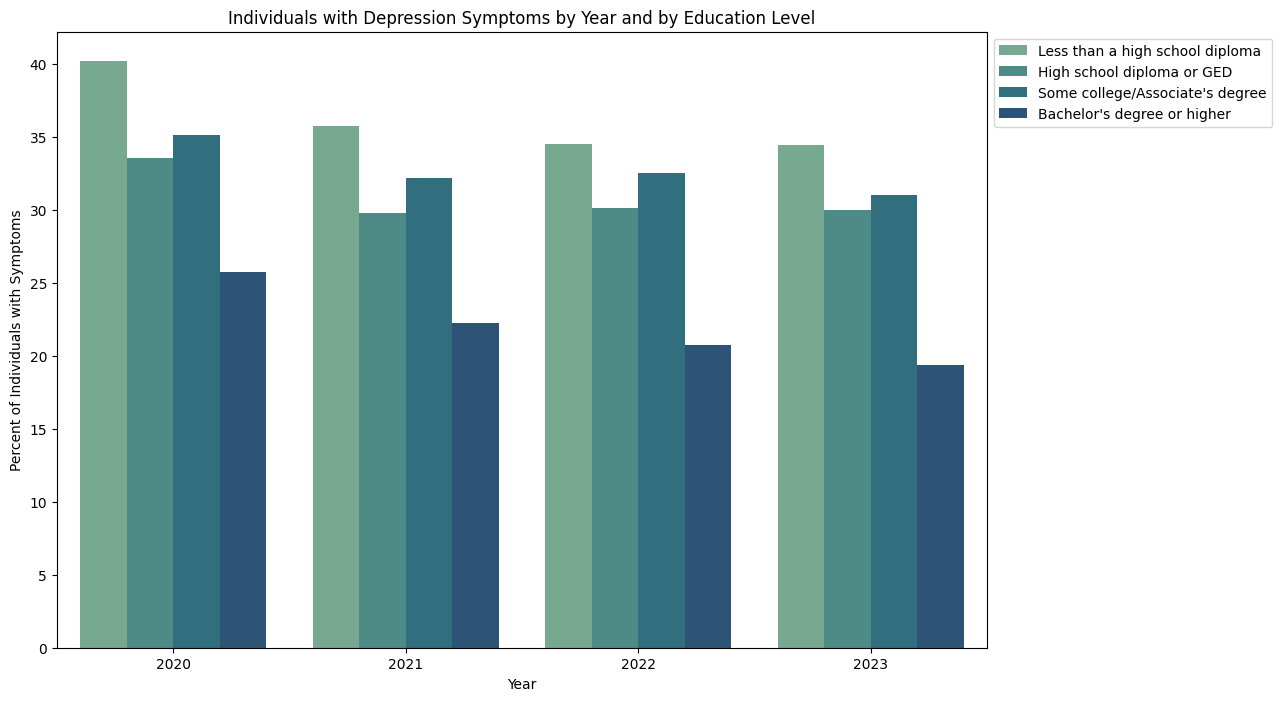

In [104]:
# Depression Barplot - by education level by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=dep_edu, errorbar=None, palette='crest')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Year and by Education Level")

In [105]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each education for each month, but only looking at the min and max month for sex

monthly_dep_edu = dep_edu.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_dep_edu['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_dep_edu[monthly_dep_edu['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
  Month                         Subgroup    Value
0   Apr      Bachelor's degree or higher  20.7200
5   Aug       High school diploma or GED  28.4750
6   Aug  Less than a high school diploma  32.2875
7   Aug  Some college/Associate's degree  30.2375

Max Values:
   Month                         Subgroup      Value
36   Nov      Bachelor's degree or higher  26.500000
37   Nov       High school diploma or GED  35.266667
38   Nov  Less than a high school diploma  43.100000
39   Nov  Some college/Associate's degree  37.183333


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Month and by Education Level')

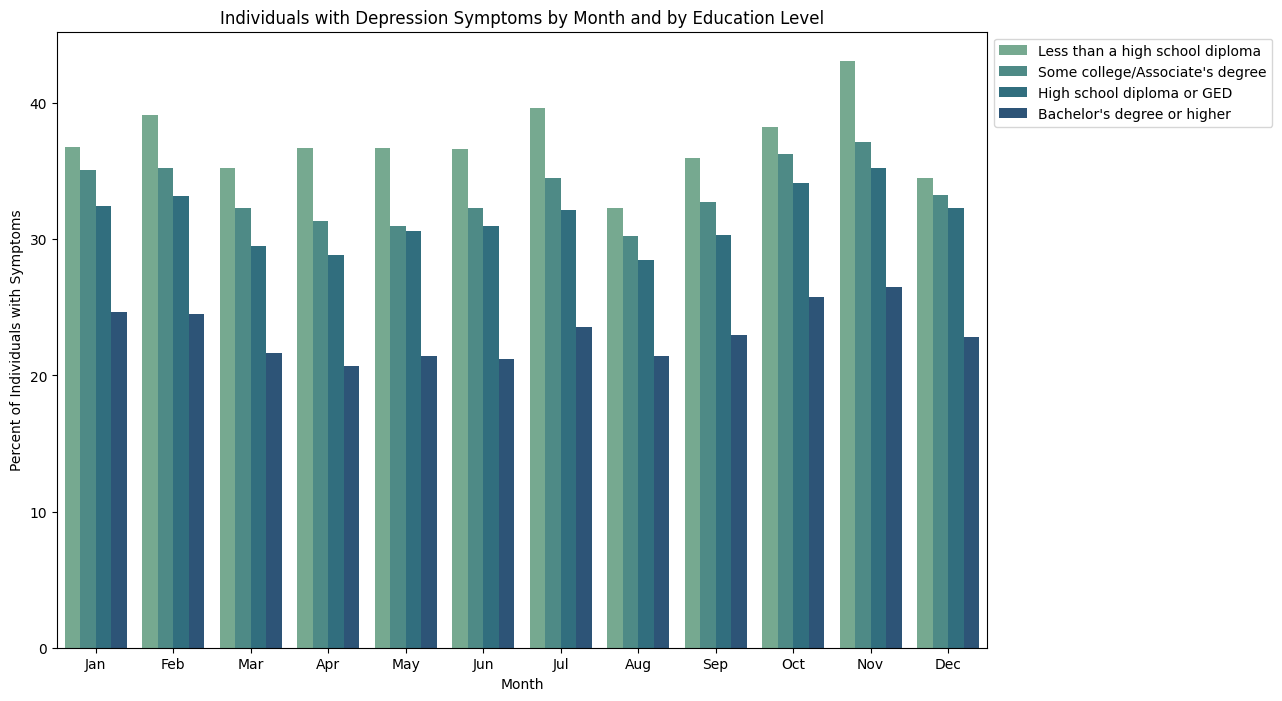

In [106]:
# Depression
plt.figure(figsize=(12, 8))

avg_values = dep_edu.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=dep_edu, order=month_order, hue_order=avg_values, errorbar=None, palette='crest')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Month and by Education Level")

### <span style='color:Red'>Anxiety</span>


In [107]:
# Anxiety
# Summary statistics per race (all dates within the data)
anx_edu.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Bachelor's degree or higher,124.0,26.686290,4.371496,18.9,23.200,25.80,29.900,37.5
High school diploma or GED,124.0,33.174194,4.286221,24.1,30.175,32.70,36.325,44.7
Less than a high school diploma,124.0,38.823387,5.539219,24.5,35.325,39.00,42.725,53.0
Some college/Associate's degree,124.0,36.041935,4.242278,28.4,32.675,35.95,39.025,46.4


In [108]:
# Anxiety
# Summary statistics per race per year
yr = anx_edu['Time Period Start Date'].dt.year
anx_edu.groupby(['Subgroup', yr])['Value'].describe()

count       mean  \
Subgroup                        Time Period Start Date                     
Bachelor's degree or higher     2020                     42.0  30.304762   
                                2021                     40.0  25.902500   
                                2022                     22.0  24.495455   
                                2023                     20.0  23.065000   
High school diploma or GED      2020                     42.0  35.752381   
                                2021                     40.0  31.475000   
                                2022                     22.0  32.200000   
                                2023                     20.0  32.230000   
Less than a high school diploma 2020                     42.0  42.419048   
                                2021                     40.0  37.472500   
                                2022                     22.0  36.781818   
                                2023                     20.0  36.220000   
Some college/Associate's degree 2020                     42.0  38.221429   
                                2021                     40.0  34.807500   
                                2022                     22.0  35.577273   
                                2023                     20.0  34.445000   

                                                             std   min  \
Subgroup                        Time Period Start Date                   
Bachelor's degree or higher     2020                    3.631163  22.7   
                                2021                    4.315178  18.9   
                                2022                    1.973510  21.2   
                                2023                    1.770601  19.7   
High school diploma or GED      2020                    3.924236  29.5   
                                2021                    4.222938  24.1   
                                2022                    3.693624  26.8   
                                2023                    3.347914  24.9   
Less than a high school diploma 2020                    4.569530  34.3   
                                2021                    5.543395  27.8   
                                2022                    4.603274  28.6   
                                2023                    4.763966  24.5   
Some college/Associate's degree 2020                    4.027257  30.2   
                                2021                    4.676257  28.4   
                                2022                    3.268745  31.0   
                                2023                    2.858317  28.7   

                                                           25%    50%     75%  \
Subgroup                        Time Period Start Date                          
Bachelor's degree or higher     2020                    27.350  30.30  33.075   
                                2021                    23.050  25.15  28.050   
                                2022                    23.050  24.55  25.825   
                                2023                    21.675  22.70  24.500   
High school diploma or GED      2020                    32.550  36.35  37.750   
                                2021                    28.200  31.70  33.450   
                                2022                    29.725  32.05  34.625   
                                2023                    29.950  30.60  35.200   
Less than a high school diploma 2020                    38.075  42.60  45.225   
                                2021                    33.875  36.55  41.350   
                                2022                    33.700  36.35  39.575   
                                2023                    33.100  36.45  40.000   
Some college/Associate's degree 2020                    34.750  38.75  40.175   
                                2021                    31.050  34.40  36.725   
                                2022                    32

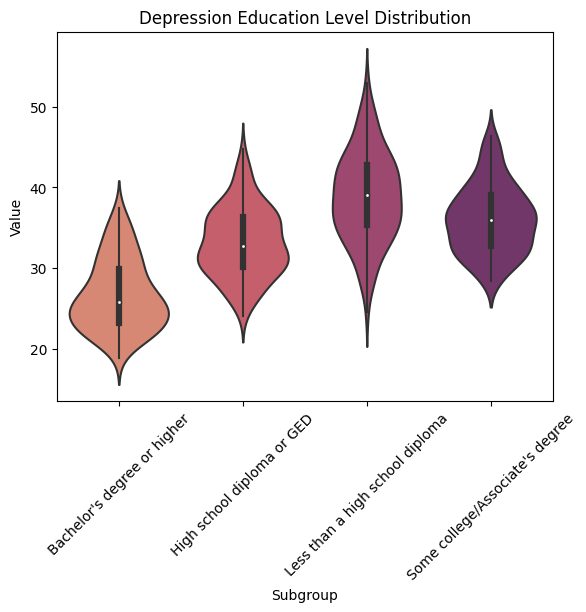

In [109]:
# Anxiety
# Anxiety distribution for all races
fig = sns.violinplot(x='Subgroup', y='Value', palette='flare', data=anx_edu.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Education Level Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Year and by Education Level')

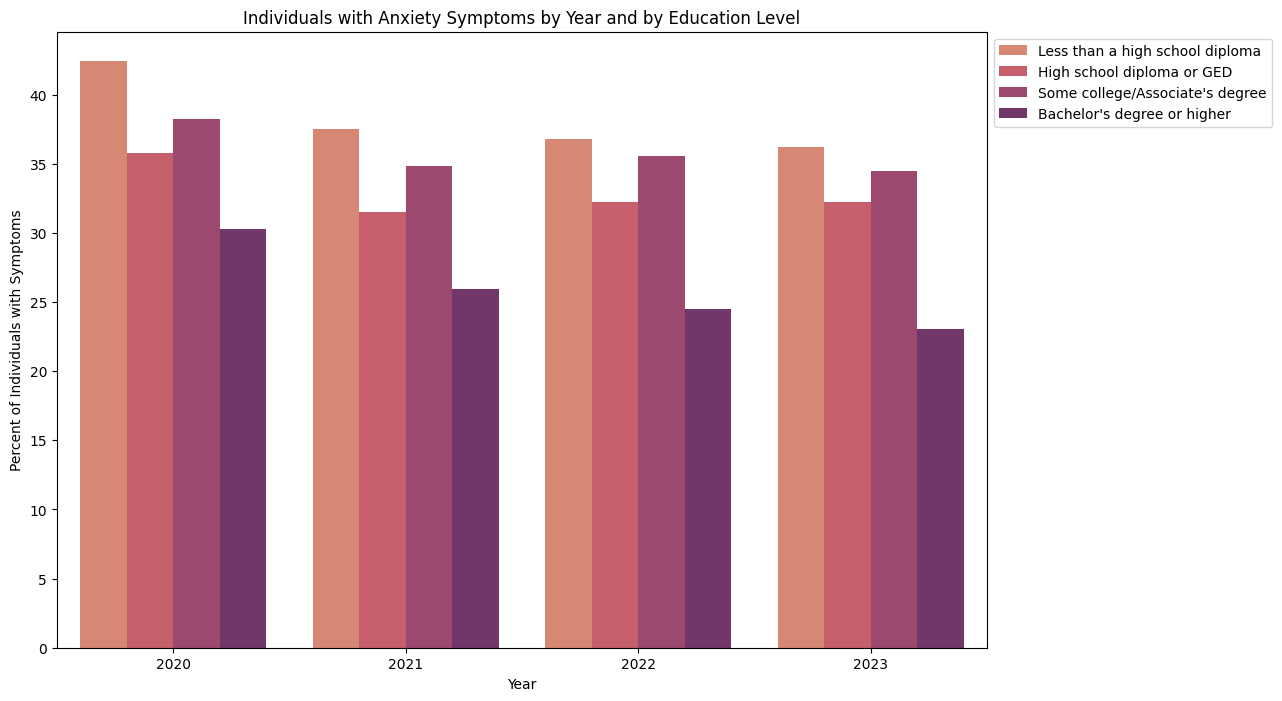

In [110]:
# Anxiety Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=anx_edu, errorbar=None, palette='flare')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Year and by Education Level")

In [111]:
# Anxiety
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_anx_edu = anx_edu.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_anx_edu['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_anx_edu[monthly_anx_edu['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
   Month                         Subgroup      Value
0    Apr      Bachelor's degree or higher  24.190000
5    Aug       High school diploma or GED  29.787500
6    Aug  Less than a high school diploma  33.875000
35   May  Some college/Associate's degree  33.241667

Max Values:
   Month                         Subgroup      Value
36   Nov      Bachelor's degree or higher  31.633333
37   Nov       High school diploma or GED  37.800000
38   Nov  Less than a high school diploma  46.100000
39   Nov  Some college/Associate's degree  41.216667


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Month and by Education Level')

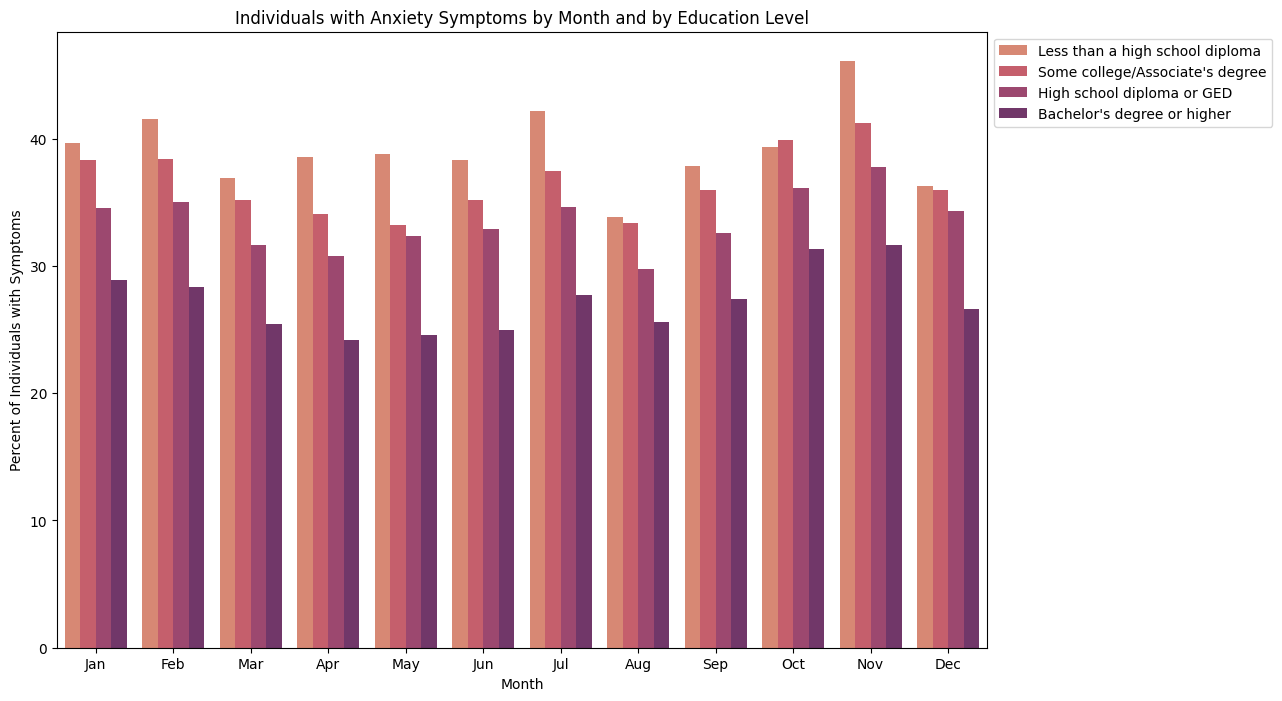

In [112]:
# Anxiety
plt.figure(figsize=(12, 8))

avg_values = anx_edu.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=anx_edu, order=month_order, hue_order=avg_values, errorbar=None, palette='flare')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Month and by Education Level")

### <span style='color:Red'>Comparing Anxiety and Depression</span>


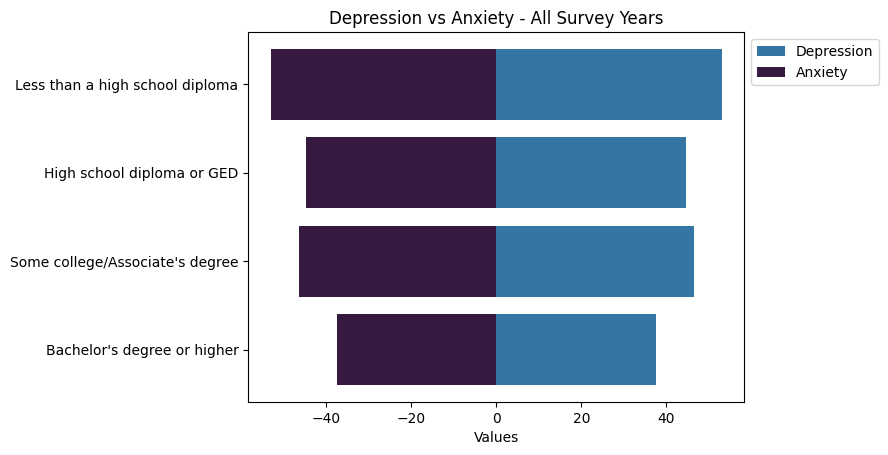

In [113]:
# Depression vs Anxiety - all years
categories = dep_edu['Subgroup']
d1 = dep_edu['Value']
d2 = anx_edu['Value']

fig, ax = plt.subplots()

# Plot left side
ax.barh(categories, d1, color='#3575a1', label='Depression')

# Plot right side
ax.barh(categories, [-x for x in d2], color='#35193e', label='Anxiety')

# Add labels and title
ax.set_xlabel('Values')
ax.set_title('Depression vs Anxiety - All Survey Years')
ax.invert_yaxis()

# Show legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## Disability
***

In [114]:
dep_dis = depression[depression['Group'] == 'By Disability status']
anx_dis = anxiety[anxiety['Group'] == 'By Disability status']

### <span style='color:Red'>Depression</span>

In [115]:
# Depression
# Summary statistics per race (all dates within the data)
dep_dis.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
With disability,70.0,55.891429,6.461295,45.7,49.950,54.85,62.15,65.7
Without disability,70.0,21.965714,4.910116,14.5,17.125,21.30,26.65,29.9


In [116]:
# Depression
# Summary statistics per race per year
yr = dep_dis['Time Period Start Date'].dt.year
dep_dis.groupby(['Subgroup', yr])['Value'].describe()

count       mean       std   min  \
Subgroup           Time Period Start Date                                     
With disability    2021                     28.0  56.003571  5.980058  46.2   
                   2022                     22.0  57.068182  6.448506  49.7   
                   2023                     20.0  54.440000  7.141016  45.7   
Without disability 2021                     28.0  21.828571  4.550283  16.7   
                   2022                     22.0  22.468182  5.168161  16.3   
                   2023                     20.0  21.605000  5.305952  14.5   

                                              25%    50%     75%   max  
Subgroup           Time Period Start Date                               
With disability    2021                    50.375  54.85  61.575  64.3  
                   2022                    50.675  57.50  62.850  65.7  
                   2023                    47.600  54.60  60.550  63.9  
Without disability 2021                    17.450  21.60  26.125  27.4  
                   2022                    17.525  22.00  26.875  29.9  
                   2023                    16.825  20.50  27.000  27.6

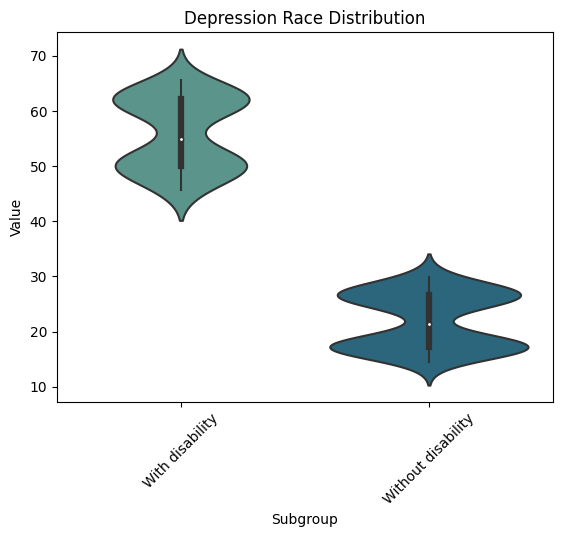

In [117]:
# Depression
# Depression distribution for both sexes
fig = sns.violinplot(x='Subgroup', y='Value', palette='crest', data=dep_dis.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Disability Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Year and by Race')

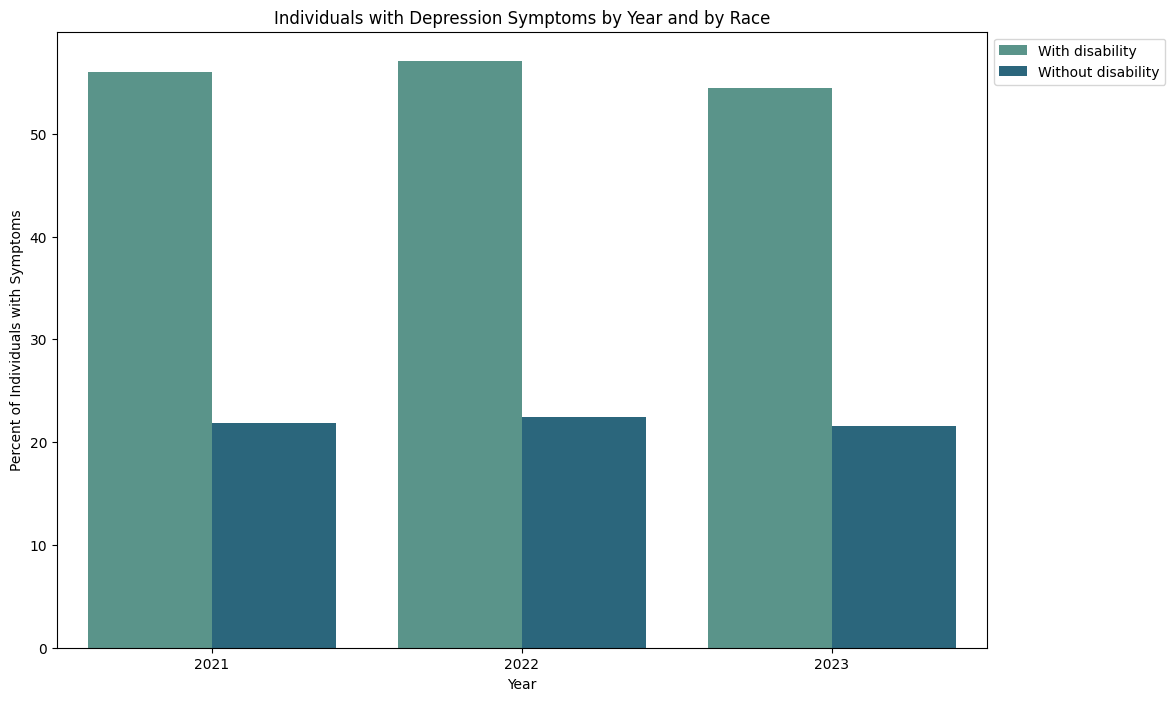

In [118]:
# Depression Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=dep_dis, errorbar=None, palette='crest')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Year and by Disability Status")

In [119]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_dep_dis = dep_dis.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_dep_dis['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_dep_dis[monthly_dep_dis['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
   Month            Subgroup   Value
6    Feb     With disability  54.050
17   May  Without disability  20.875

Max Values:
   Month            Subgroup  Value
20   Oct     With disability  59.35
21   Oct  Without disability  24.00


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Month and by Race')

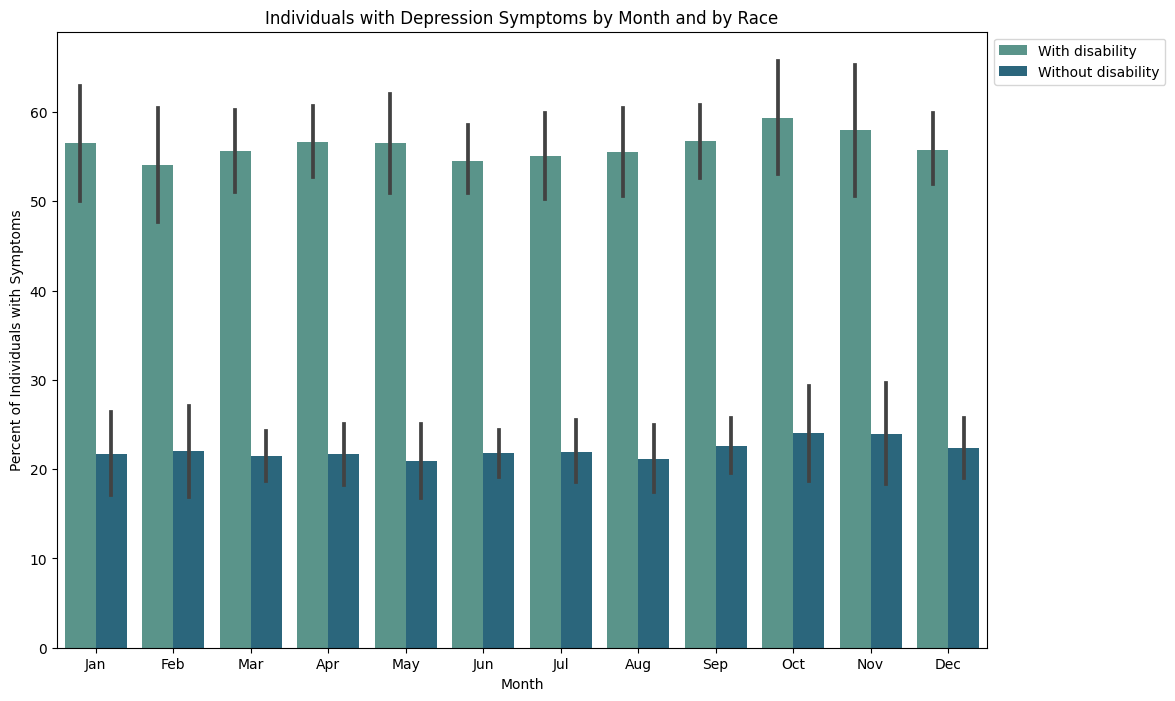

In [120]:
# Depression
plt.figure(figsize=(12, 8))

avg_values = dep_dis.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=dep_dis, order=month_order, hue_order=avg_values, palette='crest')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Month and by Disability Status")

### <span style='color:Red'>Anxiety</span>


In [121]:
# Anxiety
# Summary statistics per race (all dates within the data)
anx_dis.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
With disability,70.0,58.512857,3.958551,49.9,55.175,58.65,62.15,65.7
Without disability,70.0,24.754286,2.353024,19.6,22.800,25.00,26.65,29.9


In [122]:
# Anxiety
# Summary statistics per race per year
yr = anx_dis['Time Period Start Date'].dt.year
anx_dis.groupby(['Subgroup', yr])['Value'].describe()

count       mean       std   min  \
Subgroup           Time Period Start Date                                     
With disability    2021                     28.0  58.107143  3.980781  49.9   
                   2022                     22.0  59.827273  3.743207  54.7   
                   2023                     20.0  57.635000  3.980912  52.0   
Without disability 2021                     28.0  24.278571  2.190782  20.6   
                   2022                     22.0  25.454545  2.468801  21.6   
                   2023                     20.0  24.650000  2.374314  19.6   

                                              25%    50%     75%   max  
Subgroup           Time Period Start Date                               
With disability    2021                    54.500  56.60  61.575  64.3  
                   2022                    56.225  60.40  62.850  65.7  
                   2023                    54.075  57.85  60.550  63.9  
Without disability 2021                    22.400  24.10  26.125  27.4  
                   2022                    23.450  25.60  26.875  29.9  
                   2023                    22.800  23.65  27.000  27.6

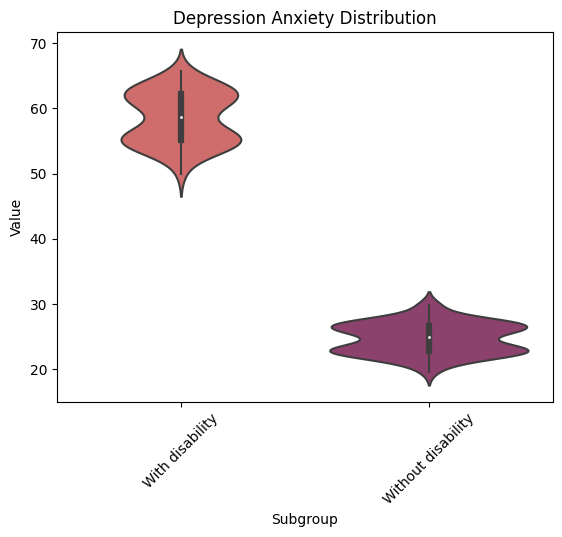

In [123]:
# Anxiety
# Depression distribution for all races
fig = sns.violinplot(x='Subgroup', y='Value', palette='flare', data=anx_dis.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Anxiety Disability Status Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Year and by Disability Status')

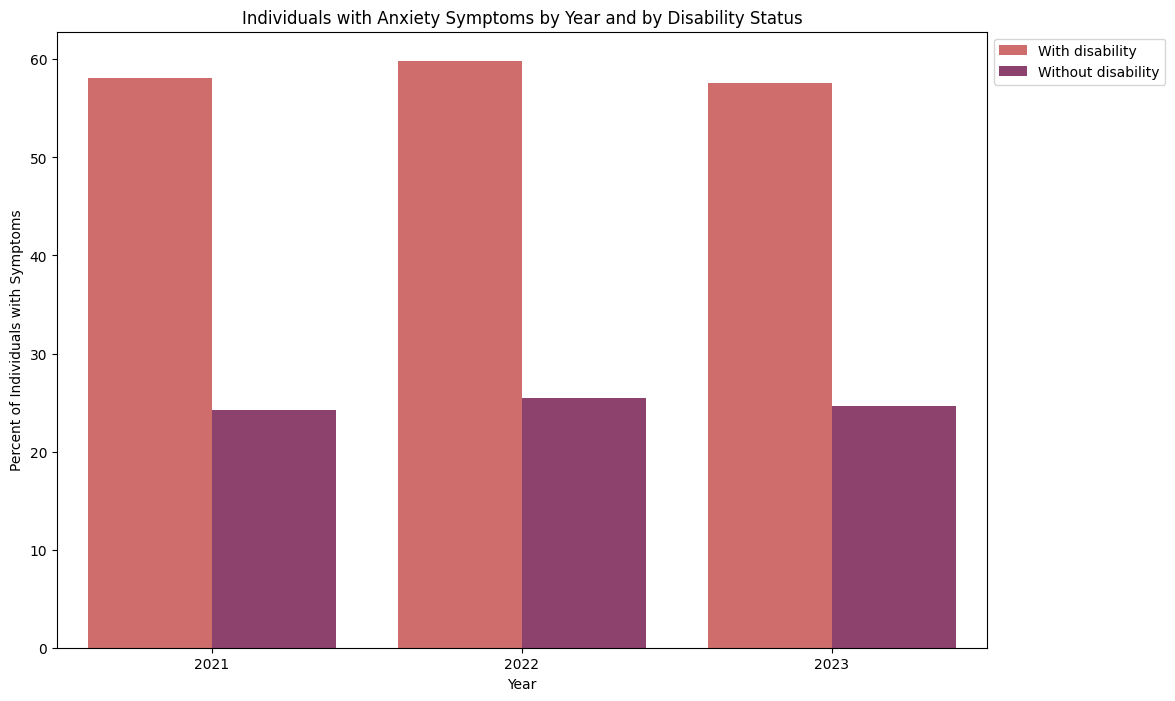

In [124]:
# Anxiety Barplot - by sex by year 2021 - 2023
plt.figure(figsize=(12, 8))

years = [ 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=anx_dis, errorbar=None, palette='flare')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Year and by Disability Status")

In [125]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_anx_dis = anx_dis.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_anx_dis['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_anx_dis[monthly_anx_dis['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
   Month            Subgroup   Value
6    Feb     With disability  57.200
17   May  Without disability  23.025

Max Values:
   Month            Subgroup  Value
18   Nov     With disability   61.9
19   Nov  Without disability   27.6


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Month and by Disability Status')

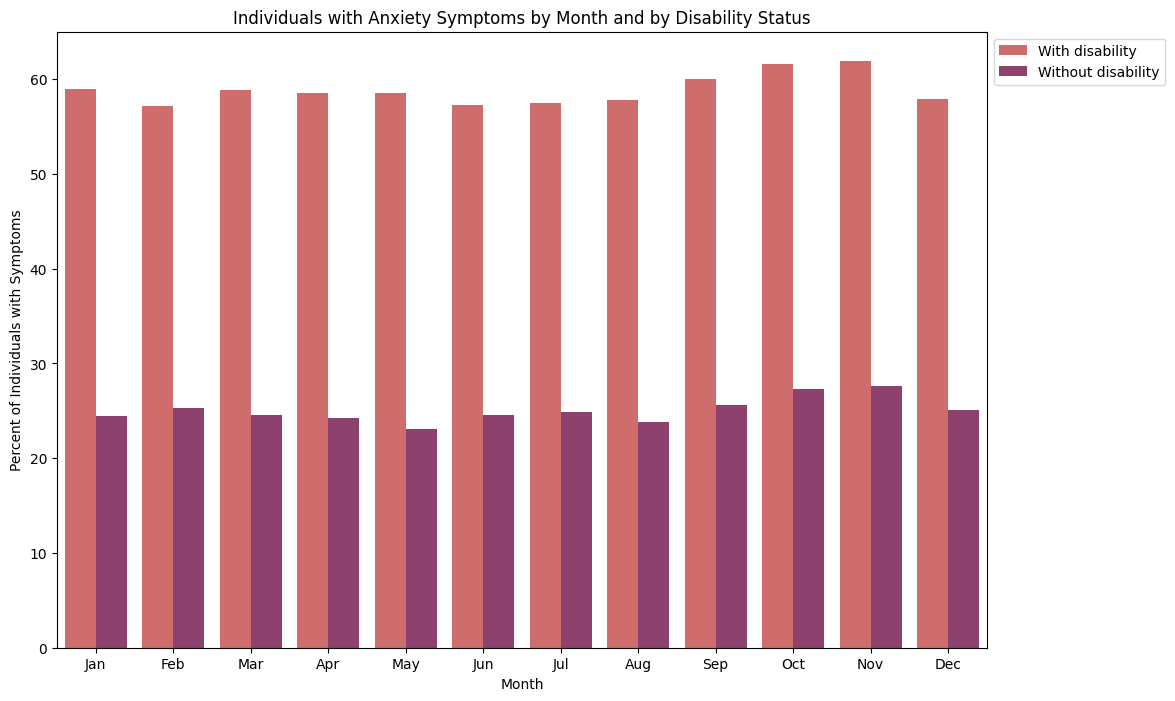

In [126]:
# Anxiety
plt.figure(figsize=(12, 8))

avg_values = anx_dis.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=anx_dis, order=month_order, hue_order=avg_values, errorbar=None, palette='flare')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Month and by Disability Status")

### <span style='color:Red'>Comparing Anxiety and Depression</span>


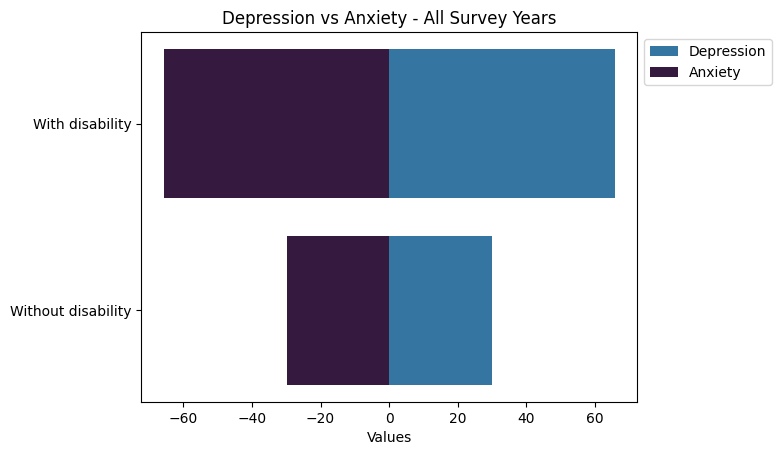

In [127]:
# Depression vs Anxiety - all years
categories = dep_dis['Subgroup']
d1 = dep_dis['Value']
d2 = anx_dis['Value']

fig, ax = plt.subplots()

# Plot left side
ax.barh(categories, d1, color='#3575a1', label='Depression')

# Plot right side
ax.barh(categories, [-x for x in d2], color='#35193e', label='Anxiety')

# Add labels and title
ax.set_xlabel('Values')
ax.set_title('Depression vs Anxiety - All Survey Years')
ax.invert_yaxis()

# Show legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## Gender Identity
***

In [128]:
dep_gend = depression[depression['Group'] == 'By Gender identity']
anx_gend = anxiety[anxiety['Group'] == 'By Gender identity']

### <span style='color:Red'>Depression</span>

In [129]:
# Depression
# Summary statistics per race (all dates within the data)
dep_gend.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Cis-gender female,58.0,28.853448,6.240873,19.3,22.800,27.85,34.875,38.1
Cis-gender male,58.0,24.356897,4.315420,17.6,20.300,24.35,28.075,32.6
Transgender,58.0,64.746552,9.675040,49.2,57.025,64.55,71.750,85.2


In [130]:
# Depression
# Summary statistics per race per year
yr = dep_gend['Time Period Start Date'].dt.year
dep_gend.groupby(['Subgroup', yr])['Value'].describe()

count       mean        std   min  \
Subgroup          Time Period Start Date                                      
Cis-gender female 2021                     16.0  28.725000   5.917939  22.2   
                  2022                     22.0  29.518182   6.283435  22.3   
                  2023                     20.0  28.225000   6.679653  19.3   
Cis-gender male   2021                     16.0  23.681250   3.900294  19.0   
                  2022                     22.0  24.950000   4.598007  19.0   
                  2023                     20.0  24.245000   4.436983  17.6   
Transgender       2021                     16.0  63.268750   8.828871  49.2   
                  2022                     22.0  67.672727   9.370784  51.0   
                  2023                     20.0  62.710000  10.300787  49.6   

                                             25%    50%     75%   max  
Subgroup          Time Period Start Date                               
Cis-gender female 2021                    23.050  28.65  34.650  35.4  
                  2022                    23.325  29.30  34.925  38.1  
                  2023                    22.000  26.80  34.950  36.1  
Cis-gender male   2021                    20.225  23.70  27.400  28.1  
                  2022                    20.475  24.75  28.800  32.6  
                  2023                    20.375  23.40  28.600  29.7  
Transgender       2021                    55.275  64.05  67.325  77.5  
                  2022                    60.850  66.85  75.925  82.0  
                  2023                    53.275  61.65  70.900  85.2

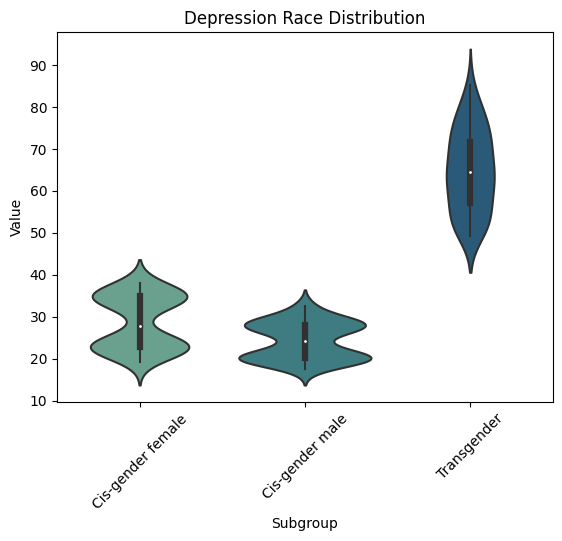

In [131]:
# Depression
# Depression distribution for both sexes
fig = sns.violinplot(x='Subgroup', y='Value', palette='crest', data=dep_gend.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Gender Identity Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Year and by Race')

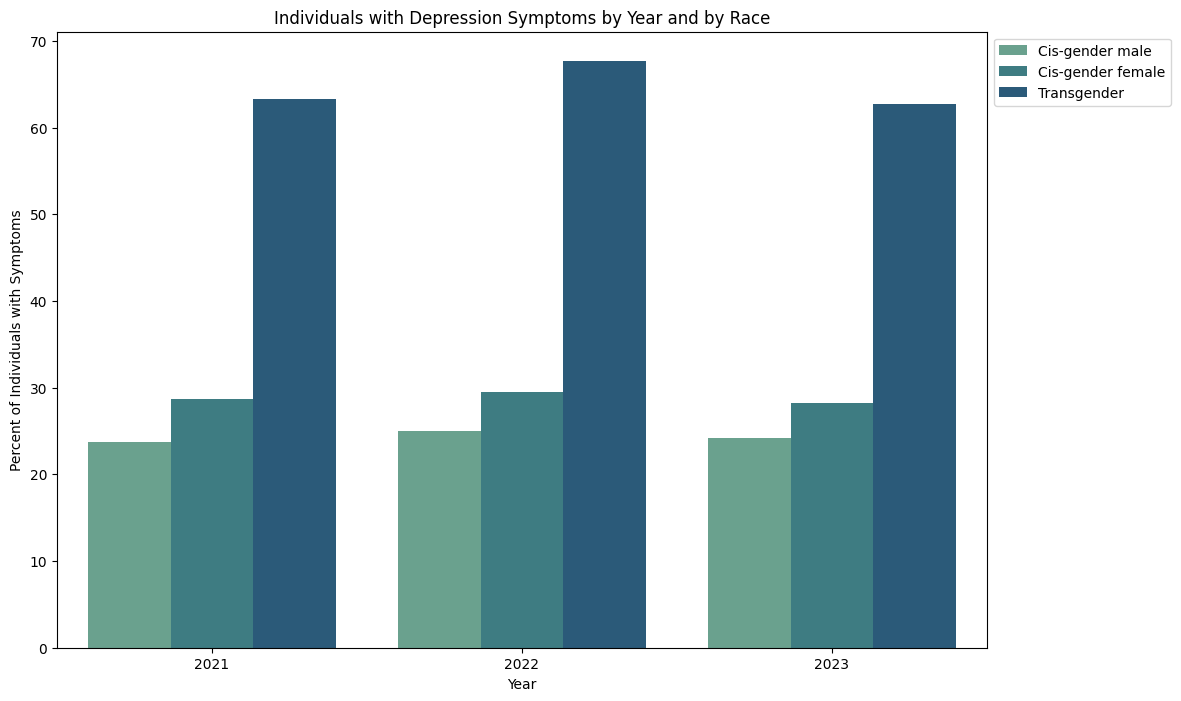

In [132]:
# Depression Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=dep_gend, errorbar=None, palette='crest')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Year and by Gender Identity")

In [133]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_dep_gend = dep_gend.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_dep_gend['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_dep_gend[monthly_dep_gend['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
   Month           Subgroup   Value
3    Aug  Cis-gender female  27.550
4    Aug    Cis-gender male  22.750
14   Jan        Transgender  59.575

Max Values:
   Month           Subgroup  Value
27   Oct  Cis-gender female  31.35
28   Oct    Cis-gender male  27.70
29   Oct        Transgender  72.15


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Month and by Race')

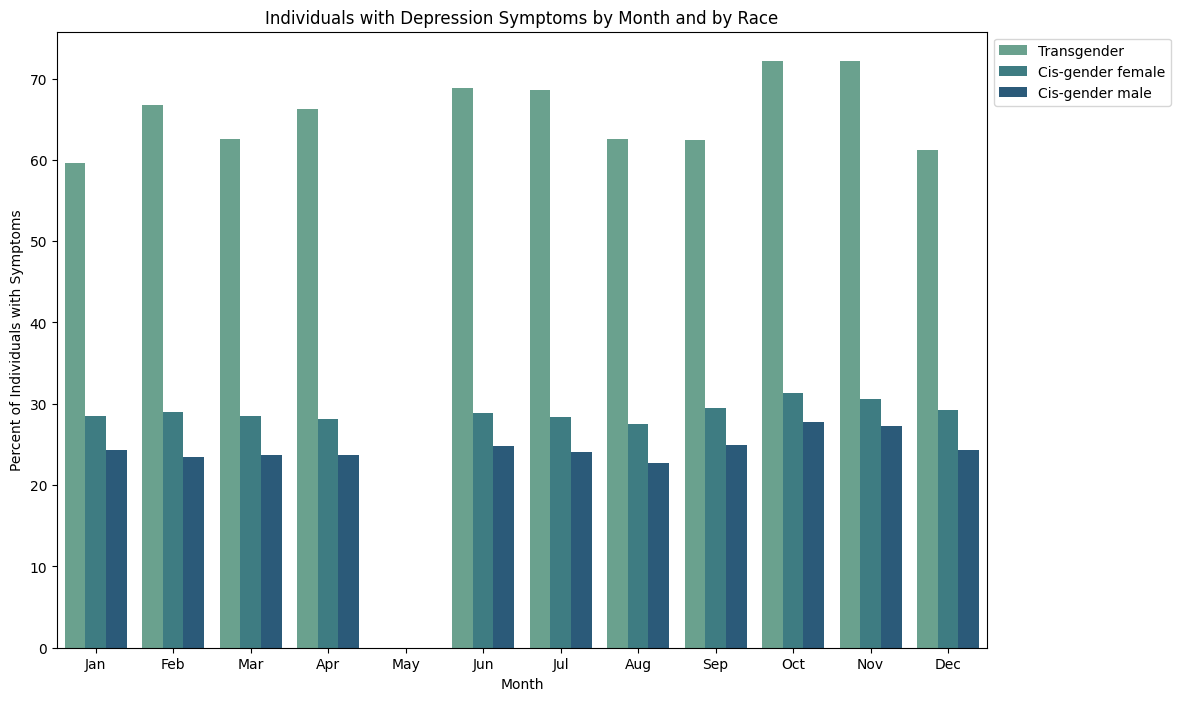

In [135]:
# Depression
plt.figure(figsize=(12, 8))

avg_values = dep_gend.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=dep_gend, order=month_order, hue_order=avg_values, errorbar=None, palette='crest')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Month and by Gender Identity")

### <span style='color:Red'>Anxiety</span>


In [136]:
# Anxiety
# Summary statistics per race (all dates within the data)
anx_gend.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Cis-gender female,58.0,32.968966,2.441039,26.6,30.925,33.45,34.875,38.1
Cis-gender male,58.0,25.970690,2.905470,20.5,23.450,26.45,28.075,32.6
Transgender,58.0,68.160345,7.943969,46.3,63.500,69.15,73.150,85.2


In [137]:
# Anxiety
# Summary statistics per race per year
yr = anx_gend['Time Period Start Date'].dt.year
anx_gend.groupby(['Subgroup', yr])['Value'].describe()

count       mean       std   min  \
Subgroup          Time Period Start Date                                     
Cis-gender female 2021                     16.0  32.456250  2.166093  29.3   
                  2022                     22.0  33.645455  2.498710  29.9   
                  2023                     20.0  32.635000  2.530295  26.6   
Cis-gender male   2021                     16.0  25.143750  2.409141  22.1   
                  2022                     22.0  26.672727  3.217243  21.9   
                  2023                     20.0  25.860000  2.853696  20.5   
Transgender       2021                     16.0  65.243750  9.401487  46.3   
                  2022                     22.0  71.463636  6.803749  57.5   
                  2023                     20.0  66.860000  6.840929  54.6   

                                             25%    50%     75%   max  
Subgroup          Time Period Start Date                               
Cis-gender female 2021                    30.875  32.30  34.650  35.4  
                  2022                    31.875  33.75  34.925  38.1  
                  2023                    30.925  32.10  34.950  36.1  
Cis-gender male   2021                    22.875  25.35  27.400  28.1  
                  2022                    24.050  26.75  28.800  32.6  
                  2023                    23.600  24.75  28.600  29.7  
Transgender       2021                    57.625  65.70  72.975  77.5  
                  2022                    66.475  71.30  77.625  82.0  
                  2023                    63.275  65.50  70.900  85.2

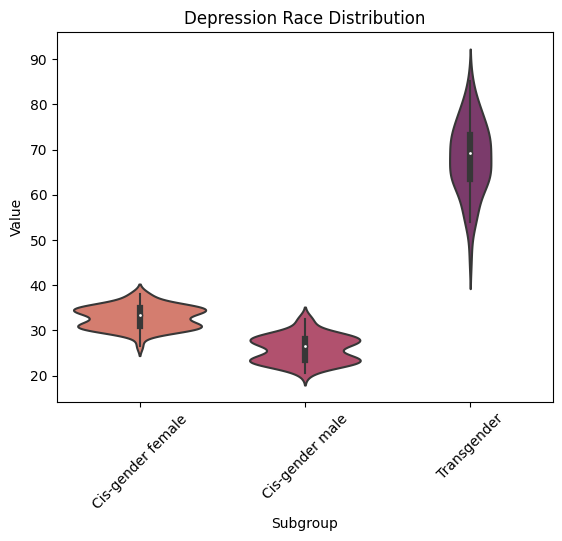

In [138]:
# Anxiety
# Depression distribution for all races
fig = sns.violinplot(x='Subgroup', y='Value', palette='flare', data=anx_gend.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Anxiety Gender Identity Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Year and by Race')

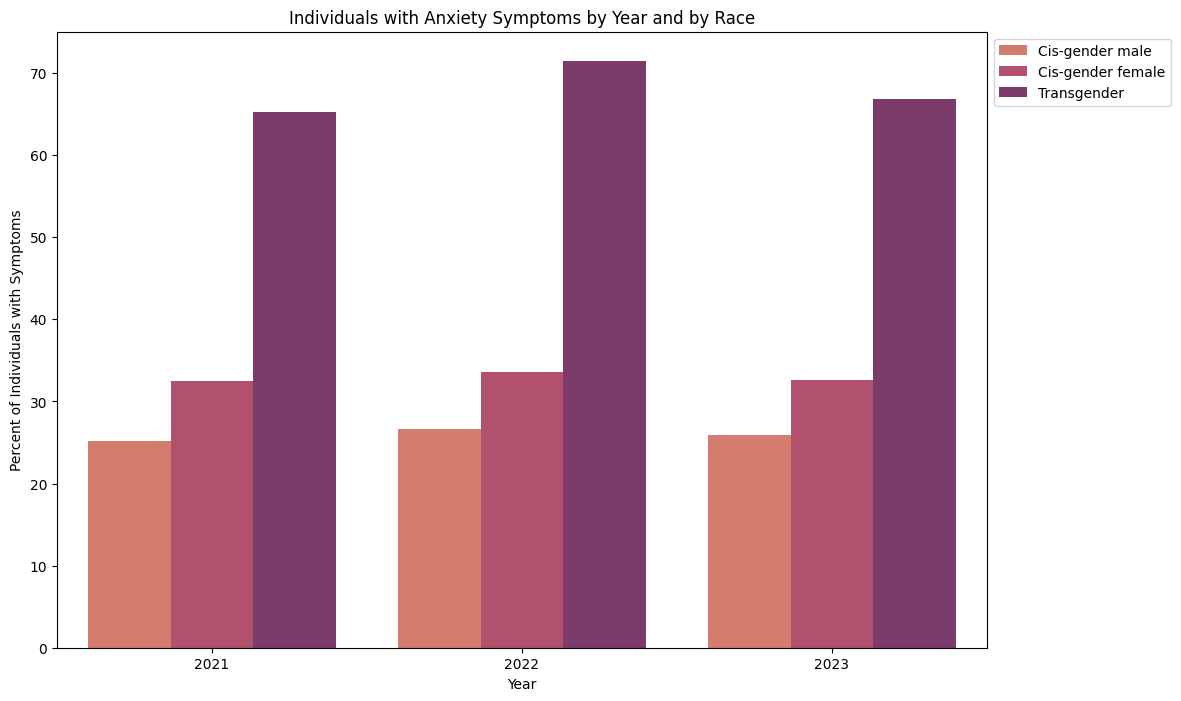

In [139]:
# Anxiety Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=anx_gend, errorbar=None, palette='flare')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Year and by Gender Identity")

In [140]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_anx_gend = anx_gend.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_anx_gend['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_anx_gend[monthly_anx_gend['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
  Month           Subgroup      Value
3   Aug  Cis-gender female  31.283333
4   Aug    Cis-gender male  24.200000
8   Dec        Transgender  61.633333

Max Values:
   Month           Subgroup  Value
24   Nov  Cis-gender female  35.70
28   Oct    Cis-gender male  29.55
26   Nov        Transgender  79.80


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Month and by Race')

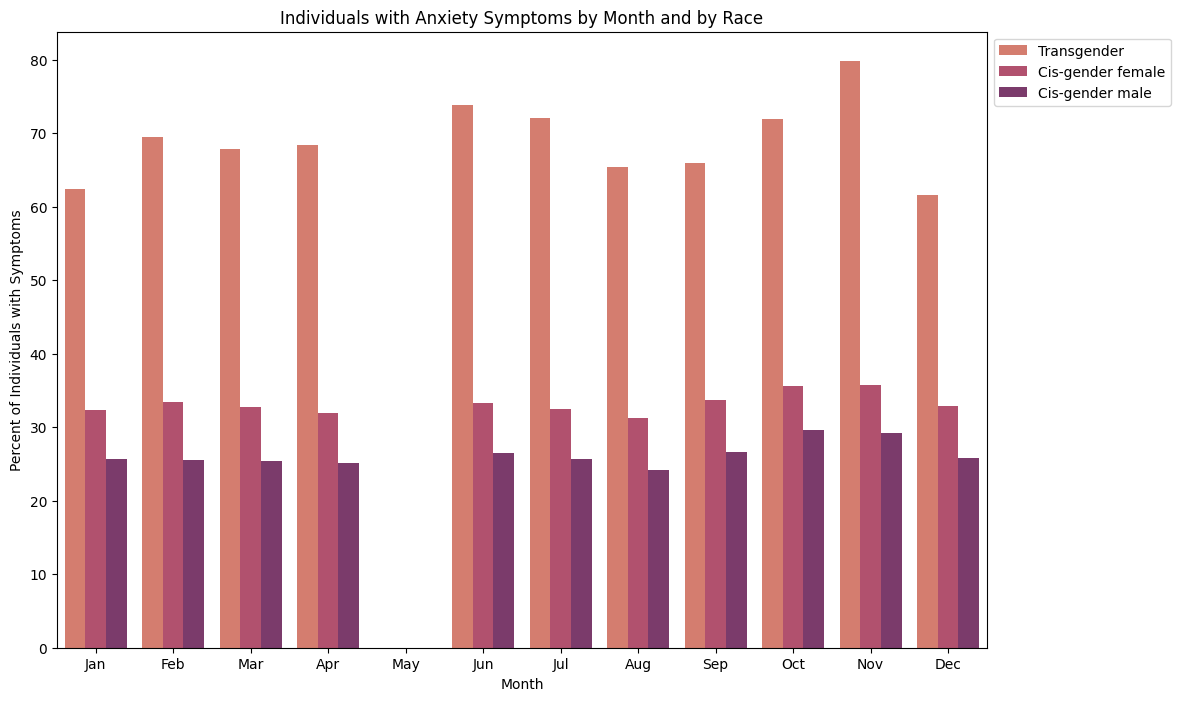

In [141]:
# Anxiety
plt.figure(figsize=(12, 8))

avg_values = anx_gend.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=anx_gend, order=month_order, hue_order=avg_values, errorbar=None, palette='flare')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Month and by Gender Identity")

### <span style='color:Red'>Comparing Anxiety and Depression</span>


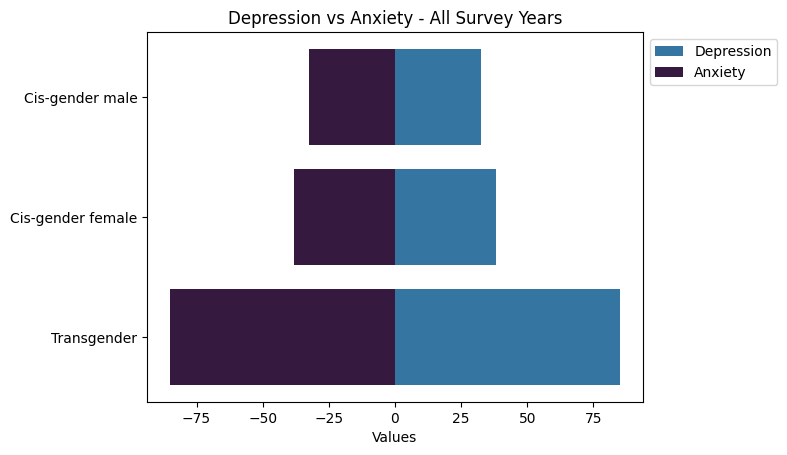

In [142]:
# Depression vs Anxiety - all years
categories = dep_gend['Subgroup']
d1 = dep_gend['Value']
d2 = anx_gend['Value']

fig, ax = plt.subplots()

# Plot left side
ax.barh(categories, d1, color='#3575a1', label='Depression')

# Plot right side
ax.barh(categories, [-x for x in d2], color='#35193e', label='Anxiety')

# Add labels and title
ax.set_xlabel('Values')
ax.set_title('Depression vs Anxiety - All Survey Years')
ax.invert_yaxis()

# Show legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## Sexual Orientation
***

In [20]:
dep_or = depression[depression['Group'] == 'By Sexual orientation']
anx_or = anxiety[anxiety['Group'] == 'By Sexual orientation']

### <span style='color:Red'>Depression</span>

In [144]:
# Depression
# Summary statistics per race (all dates within the data)
dep_or.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Bisexual,58.0,52.700000,8.417901,39.1,44.625,53.00,60.150,65.4
Gay or lesbian,58.0,38.627586,7.288414,26.1,33.100,39.20,44.775,51.8
Straight,58.0,24.724138,5.084559,16.7,19.625,24.05,29.475,33.4


In [145]:
# Depression
# Summary statistics per race per year
yr = dep_or['Time Period Start Date'].dt.year
dep_or.groupby(['Subgroup', yr])['Value'].describe()

count       mean       std   min  \
Subgroup       Time Period Start Date                                     
Bisexual       2021                     16.0  54.512500  7.578379  44.6   
               2022                     22.0  53.268182  8.351640  40.2   
               2023                     20.0  50.625000  9.081727  39.1   
Gay or lesbian 2021                     16.0  41.318750  6.891659  30.4   
               2022                     22.0  38.654545  7.168166  26.1   
               2023                     20.0  36.445000  7.345853  26.3   
Straight       2021                     16.0  24.256250  4.753941  19.1   
               2022                     22.0  25.395455  5.265836  19.2   
               2023                     20.0  24.360000  5.312488  16.7   

                                          25%    50%     75%   max  
Subgroup       Time Period Start Date                               
Bisexual       2021                    47.550  54.15  60.525  65.4  
               2022                    44.825  54.40  60.225  64.9  
               2023                    41.900  51.80  59.100  62.8  
Gay or lesbian 2021                    35.600  41.35  46.200  51.8  
               2022                    33.675  36.05  45.350  51.8  
               2023                    29.175  36.80  41.975  48.6  
Straight       2021                    19.675  24.25  28.925  29.4  
               2022                    20.225  25.10  29.975  33.4  
               2023                    19.600  22.95  29.700  30.4

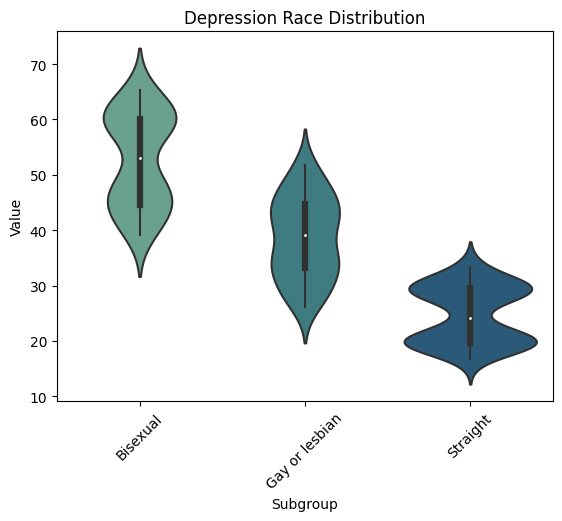

In [146]:
# Depression
# Depression distribution for both sexes
fig = sns.violinplot(x='Subgroup', y='Value', palette='crest', data=dep_or.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Sexual Orientation Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Year and by Race')

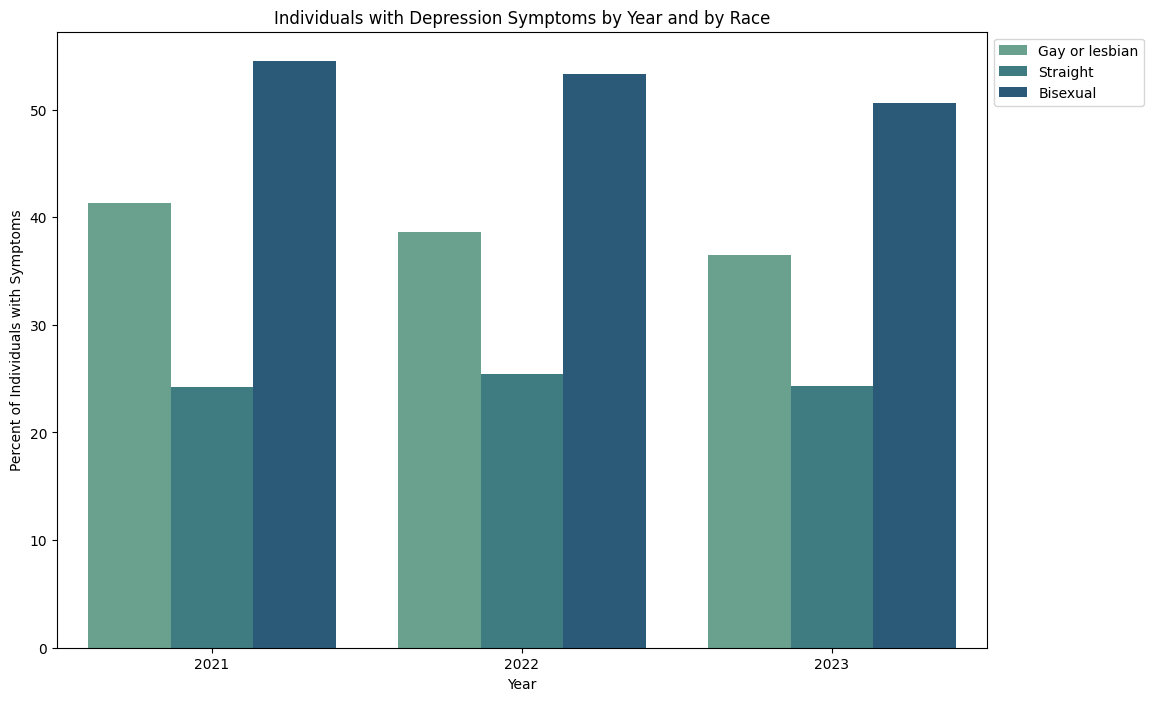

In [147]:
# Depression Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=dep_or, errorbar=None, palette='crest')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Year and by Sexual Orientation")

In [148]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_dep_or = dep_or.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_dep_or['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_dep_or[monthly_dep_or['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
   Month        Subgroup      Value
24   Nov        Bisexual  49.550000
19   Jun  Gay or lesbian  33.925000
5    Aug        Straight  23.216667

Max Values:
   Month        Subgroup  Value
27   Oct        Bisexual  56.55
25   Nov  Gay or lesbian  43.95
29   Oct        Straight  27.65


Text(0.5, 1.0, 'Individuals with Depression Symptoms by Month and by Race')

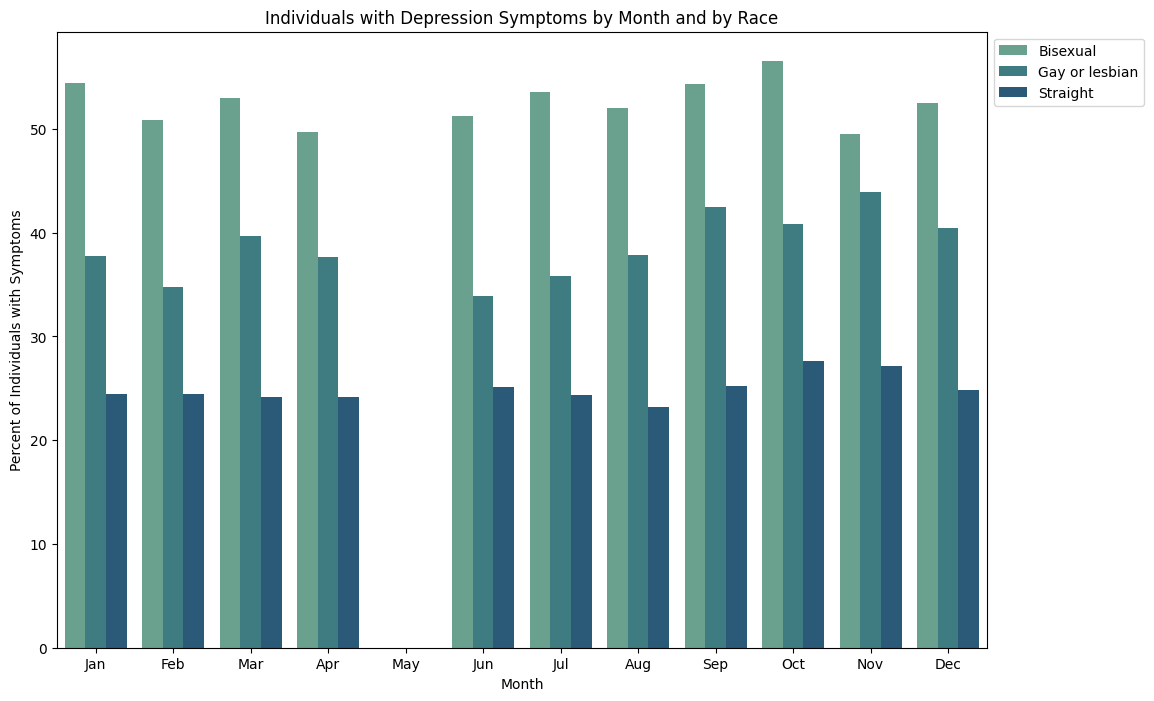

In [150]:
# Depression
plt.figure(figsize=(12, 8))

avg_values = dep_or.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=dep_or, order=month_order, hue_order=avg_values, errorbar=None, palette='crest')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Depression Symptoms by Month and by Sexual Orientation")

### <span style='color:Red'>Anxiety</span>


In [151]:
# Anxiety
# Summary statistics per race (all dates within the data)
anx_or.groupby('Subgroup')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Subgroup,,,,,,,,
Bisexual,58.0,57.584483,3.949408,48.5,54.925,58.15,60.150,65.4
Gay or lesbian,58.0,42.108621,4.725381,31.5,38.475,42.10,45.450,51.8
Straight,58.0,27.508621,2.582484,21.6,25.325,28.10,29.475,33.4


In [152]:
# Anxiety
# Summary statistics per race per year
yr = anx_or['Time Period Start Date'].dt.year
anx_or.groupby(['Subgroup', yr])['Value'].describe()

count       mean       std   min  \
Subgroup       Time Period Start Date                                     
Bisexual       2021                     16.0  58.281250  4.342076  51.3   
               2022                     22.0  58.304545  3.560294  52.5   
               2023                     20.0  56.235000  3.869486  48.5   
Gay or lesbian 2021                     16.0  44.206250  4.661969  36.7   
               2022                     22.0  41.972727  4.997731  31.5   
               2023                     20.0  40.580000  4.004550  32.2   
Straight       2021                     16.0  26.825000  2.133385  24.2   
               2022                     22.0  28.263636  2.804511  24.0   
               2023                     20.0  27.225000  2.565741  21.6   

                                          25%    50%     75%   max  
Subgroup       Time Period Start Date                               
Bisexual       2021                    54.775  58.75  60.525  65.4  
               2022                    55.875  58.65  60.225  64.9  
               2023                    54.375  56.35  59.100  62.8  
Gay or lesbian 2021                    41.700  44.35  46.875  51.8  
               2022                    38.525  42.10  45.650  51.8  
               2023                    37.950  41.20  42.500  48.6  
Straight       2021                    24.950  26.75  28.925  29.4  
               2022                    26.250  28.40  29.975  33.4  
               2023                    25.475  25.80  29.700  30.4

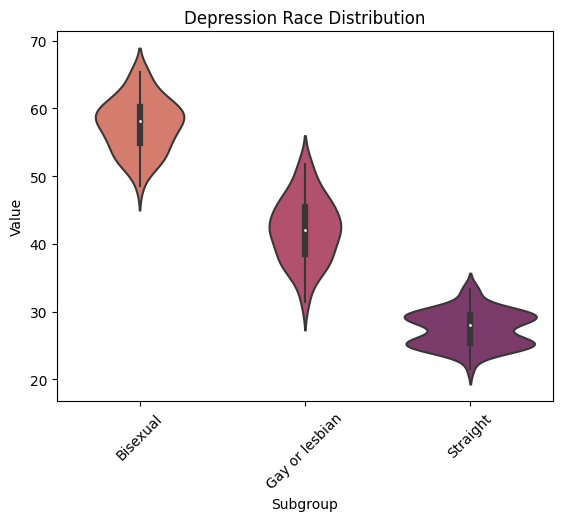

In [153]:
# Anxiety
# Depression distribution for all races
fig = sns.violinplot(x='Subgroup', y='Value', palette='flare', data=anx_or.sort_values('Subgroup'))

# Rotate x-axis tick labels
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.title("Depression Sexual Orientation Distribution")
plt.show()


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Year and by Race')

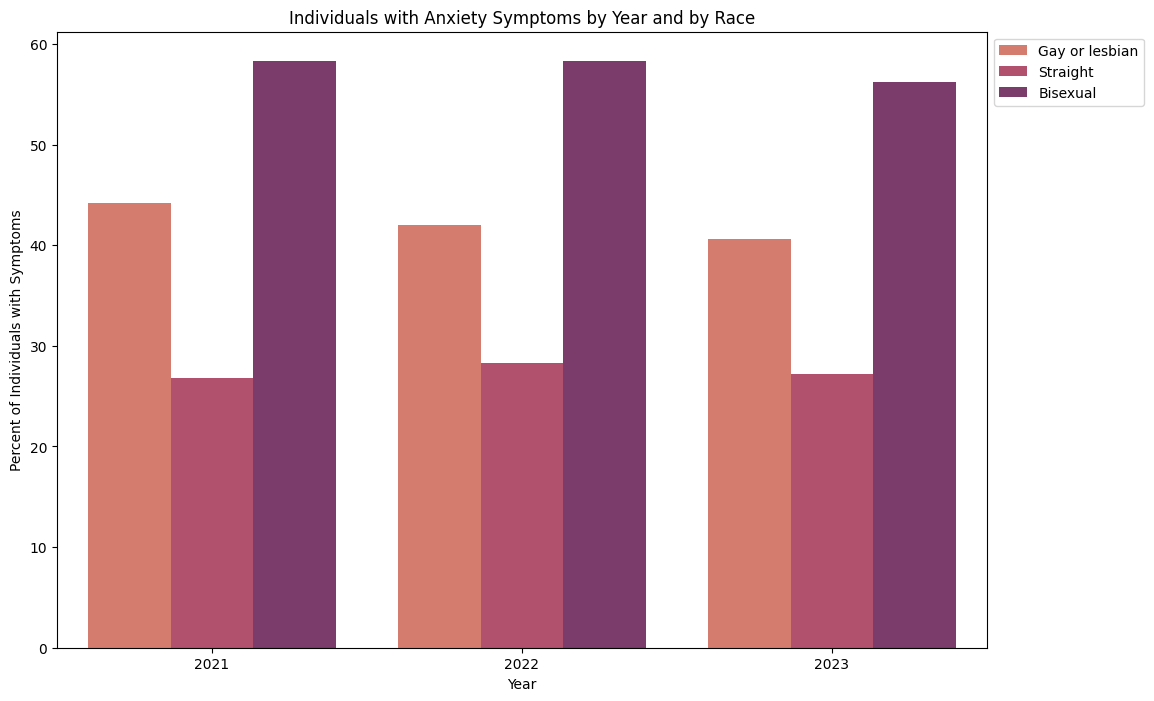

In [154]:
# Anxiety Barplot - by sex by year 2020 - 2023
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
plt.xticks(years)


sns.barplot(x='Year', y='Value',hue='Subgroup', data=anx_or, errorbar=None, palette='flare')
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Year and by Sexual Orientation")

In [155]:
# Depression
# Looking at monthly distributions. Here we are finding the mean of each sex for each month, but only looking at the min and max month for sex

monthly_anx_or = anx_or.groupby(['Month', 'Subgroup'])['Value'].mean().reset_index()

# Get a list of unique subgroups
unique_subgroups = monthly_anx_or['Subgroup'].unique()

# Initialize empty lists to store results
min_values = []
max_values = []

# Iterate over each subgroup
for subgroup in unique_subgroups:
    subgroup_data = monthly_anx_or[monthly_anx_or['Subgroup'] == subgroup]

    # Check if there's data for the subgroup before calculating min and max
    if not subgroup_data.empty:
        min_value = subgroup_data.loc[subgroup_data['Value'].idxmin()]
        max_value = subgroup_data.loc[subgroup_data['Value'].idxmax()]

        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to DataFrames
min_df = pd.DataFrame(min_values)
max_df = pd.DataFrame(max_values)

# Print the results
print("Min Values:")
print(min_df)

print("\nMax Values:")
print(max_df)


Min Values:
   Month        Subgroup  Value
0    Apr        Bisexual  55.00
19   Jun  Gay or lesbian  38.20
5    Aug        Straight  25.75

Max Values:
   Month        Subgroup  Value
27   Oct        Bisexual  61.45
25   Nov  Gay or lesbian  49.55
29   Oct        Straight  30.90


Text(0.5, 1.0, 'Individuals with Anxiety Symptoms by Month and by Race')

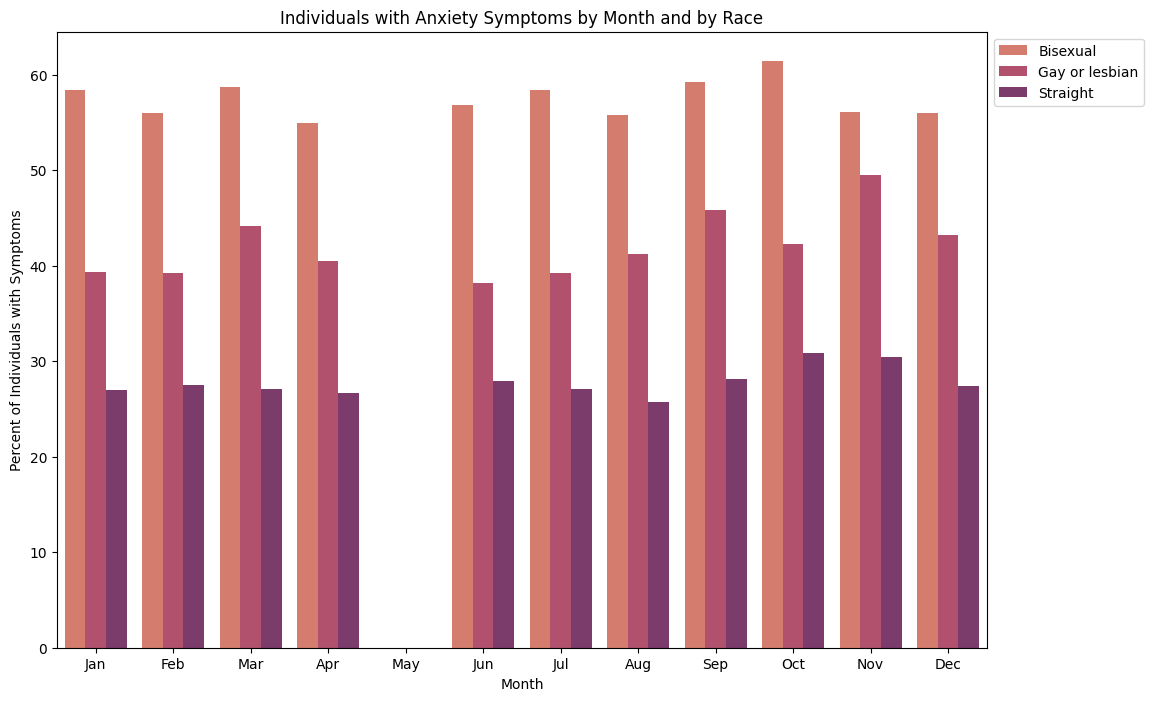

In [156]:
# Anxiety
plt.figure(figsize=(12, 8))

avg_values = anx_or.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index

sns.barplot(x='Month', y='Value', hue='Subgroup', data=anx_or, order=month_order, hue_order=avg_values, errorbar=None, palette='flare')
plt.xlabel("Month")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Percent of Individuals with Symptoms")
plt.title("Individuals with Anxiety Symptoms by Month and by Sexual Orientation")

### <span style='color:Red'>Comparing Anxiety and Depression</span>


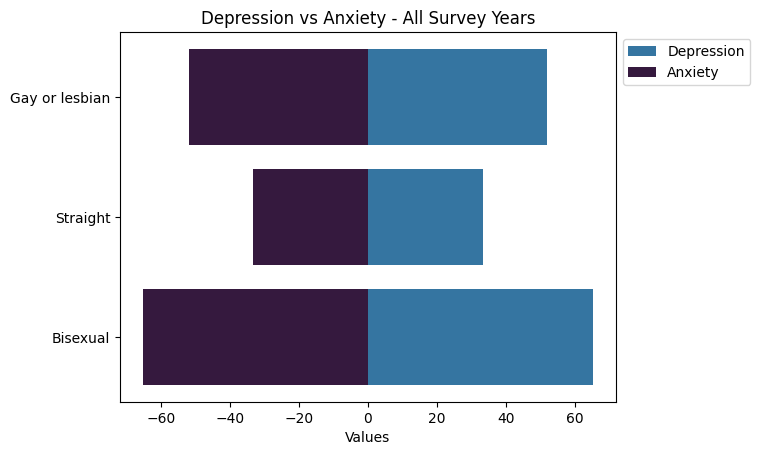

In [157]:
# Depression vs Anxiety - all years
categories = dep_or['Subgroup']
d1 = dep_or['Value']
d2 = anx_or['Value']

fig, ax = plt.subplots()

# Plot left side
ax.barh(categories, d1, color='#3575a1', label='Depression')

# Plot right side
ax.barh(categories, [-x for x in d2], color='#35193e', label='Anxiety')

# Add labels and title
ax.set_xlabel('Values')
ax.set_title('Depression vs Anxiety - All Survey Years')
ax.invert_yaxis()

# Show legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## State
***

In [158]:
dep_state = depression[depression['Group'] == 'By State']
anx_state = anxiety[anxiety['Group'] == 'By State']

### <span style='color:Red'>Depression</span>

In [162]:
# National average ea. year - Depression 
# Compare to states 
avg_year = depression_national.groupby(depression_national['Time Period Start Date'].dt.year)['Value'].mean()
avg_year_df = avg_year.reset_index()


dep_state.loc[:,'Time Period Start Date'] = pd.to_datetime(dep_state['Time Period Start Date'])
dep_year_state = dep_state['Time Period Start Date'].dt.year
dep_state_yr = dep_state.groupby(['Subgroup', dep_year_state])['Value'].mean().reset_index()

depression_national.loc[:, 'Time Period Start Date'] = pd.to_datetime(depression_national['Time Period Start Date'])
avg_year = depression_national.groupby(depression_national['Time Period Start Date'].dt.year)['Value'].mean().reset_index()

# Merge data frames
merged_df = pd.merge(dep_state_yr, avg_year, left_on='Time Period Start Date', right_on='Time Period Start Date', suffixes=('_state', '_national'))

# Count the number of states higher than the national average each year
higher_than_national = merged_df[merged_df['Value_state'] > merged_df['Value_national']]

state_counts = higher_than_national.groupby('Subgroup').size().reset_index(name='Count')

print(state_counts.sort_values(by='Count', ascending=False))

          Subgroup  Count
0          Alabama      4
14          Nevada      4
25   West Virginia      4
3         Arkansas      4
4       California      4
22           Texas      4
18          Oregon      4
17        Oklahoma      4
15      New Mexico      4
10        Kentucky      4
11       Louisiana      4
12     Mississippi      4
21       Tennessee      3
13        Missouri      3
1           Alaska      3
6          Georgia      3
5          Florida      3
2          Arizona      3
9          Indiana      2
23            Utah      2
24      Washington      2
16            Ohio      1
8         Illinois      1
7            Idaho      1
19    Pennsylvania      1
20  South Carolina      1
26         Wyoming      1


In [163]:
state_list = dep_state['Subgroup'].unique()

missing_states = set(state_list) - set(state_counts['Subgroup'])

missing_states_list = list(missing_states)

print("States that are NOT higher than the national average:", missing_states_list)

States that are NOT higher than the national average: ['North Carolina', 'Massachusetts', 'Maryland', 'Rhode Island', 'District of Columbia', 'Michigan', 'Connecticut', 'North Dakota', 'Delaware', 'New Jersey', 'Minnesota', 'Wisconsin', 'Nebraska', 'Iowa', 'Montana', 'South Dakota', 'Maine', 'New York', 'Colorado', 'Vermont', 'Hawaii', 'Kansas', 'New Hampshire', 'Virginia']


In [164]:
# Filter rows for the year 2020
merged_df_2020 = merged_df[merged_df['Time Period Start Date'] == 2020]

m_2020 = merged_df_2020[merged_df_2020['Value_state'] > merged_df_2020['Value_national']]

m_2020 = m_2020.sort_values(by='Value_state', ascending=False)

print(m_2020[['Time Period Start Date', 'Subgroup', 'Value_state', 'Value_national']])

    Time Period Start Date       Subgroup  Value_state  Value_national
18                    2020      Louisiana    36.919048       32.016667
28                    2020         Nevada    36.042857       32.016667
24                    2020    Mississippi    35.921429       32.016667
31                    2020     New Mexico    35.002381       32.016667
37                    2020         Oregon    34.633333       32.016667
43                    2020          Texas    34.369048       32.016667
4                     2020     California    34.269048       32.016667
3                     2020       Arkansas    33.785714       32.016667
36                    2020       Oklahoma    33.707143       32.016667
9                     2020        Florida    33.633333       32.016667
17                    2020       Kentucky    33.630952       32.016667
2                     2020        Arizona    33.392857       32.016667
48                    2020  West Virginia    33.366667       32.016667
10    

In [166]:
# Filter rows for the year 2021
merged_df_2021 = merged_df[merged_df['Time Period Start Date'] == 2021]

m_2021 = merged_df_2021[merged_df_2021['Value_state'] > merged_df_2021['Value_national']]

m_2021 = m_2021.sort_values(by='Value_state', ascending=False)

print(m_2021[['Time Period Start Date', 'Subgroup', 'Value_state', 'Value_national']])

    Time Period Start Date       Subgroup  Value_state  Value_national
69                    2021      Louisiana      33.2025           28.46
87                    2021       Oklahoma      32.4525           28.46
99                    2021  West Virginia      31.8075           28.46
54                    2021       Arkansas      31.7450           28.46
75                    2021    Mississippi      31.5250           28.46
79                    2021         Nevada      31.5150           28.46
68                    2021       Kentucky      30.6625           28.46
88                    2021         Oregon      30.6600           28.46
82                    2021     New Mexico      30.4600           28.46
51                    2021        Alabama      30.3975           28.46
55                    2021     California      30.2075           28.46
93                    2021      Tennessee      30.0375           28.46
94                    2021          Texas      30.0100           28.46
61    

In [168]:
# Filter rows for the year 2022
merged_df_2022 = merged_df[merged_df['Time Period Start Date'] == 2022]

m_2022 = merged_df_2022[merged_df_2022['Value_state'] > merged_df_2022['Value_national']]

m_2022 = m_2022.sort_values(by='Value_state', ascending=False)

print(m_2022[['Time Period Start Date', 'Subgroup', 'Value_state', 'Value_national']])

     Time Period Start Date       Subgroup  Value_state  Value_national
126                    2022    Mississippi    33.900000       28.004545
120                    2022      Louisiana    33.222727       28.004545
138                    2022       Oklahoma    32.750000       28.004545
150                    2022  West Virginia    32.686364       28.004545
119                    2022       Kentucky    32.390909       28.004545
105                    2022       Arkansas    31.845455       28.004545
102                    2022        Alabama    31.550000       28.004545
130                    2022         Nevada    30.954545       28.004545
145                    2022          Texas    30.868182       28.004545
133                    2022     New Mexico    30.763636       28.004545
139                    2022         Oregon    29.336364       28.004545
144                    2022      Tennessee    29.104545       28.004545
146                    2022           Utah    28.995455       28

In [170]:
# Filter rows for the year 2023
merged_df_2023 = merged_df[merged_df['Time Period Start Date'] == 2023]

m_2023 = merged_df_2023[merged_df_2023['Value_state'] > merged_df_2023['Value_national']]

m_2023 = m_2023.sort_values(by='Value_state', ascending=False)

print(m_2023[['Time Period Start Date', 'Subgroup', 'Value_state', 'Value_national']])

     Time Period Start Date        Subgroup  Value_state  Value_national
177                    2023     Mississippi       32.515          26.895
171                    2023       Louisiana       31.580          26.895
201                    2023   West Virginia       31.505          26.895
153                    2023         Alabama       31.165          26.895
170                    2023        Kentucky       30.700          26.895
156                    2023        Arkansas       30.385          26.895
189                    2023        Oklahoma       30.090          26.895
181                    2023          Nevada       30.065          26.895
195                    2023       Tennessee       29.085          26.895
197                    2023            Utah       28.935          26.895
196                    2023           Texas       28.640          26.895
190                    2023          Oregon       28.480          26.895
184                    2023      New Mexico       2

In [177]:
# Number of states that are higher than average per year 
num_states_2020 = len(m_2020)
num_states_2021 = len(m_2021)
num_states_2022 = len(m_2022)
num_states_2023 = len(m_2023)

print("Number of states higher than national average in 2020:", num_states_2020)
print("Number of states higher than national average in 2021:", num_states_2021)
print("Number of states higher than national average in 2022:", num_states_2022)
print("Number of states higher than national average in 2023:", num_states_2023)


Number of states higher than national average in 2020: 17
Number of states higher than national average in 2021: 19
Number of states higher than national average in 2022: 19
Number of states higher than national average in 2023: 23


### <span style='color:Red'>Anxiety</span>

In [182]:
# National average ea. year - Anxiety 
# States that are above national average and how many times out of the 4 years

anx_state.loc[:, 'Time Period Start Date'] = pd.to_datetime(anx_state['Time Period Start Date'])
anx_year_state = anx_state['Time Period Start Date'].dt.year
anx_state_yr = anx_state.groupby(['Subgroup', anx_year_state])['Value'].mean().reset_index()

anxiety_national.loc[:, 'Time Period Start Date'] = pd.to_datetime(anxiety_national['Time Period Start Date'])
avg_year = anxiety_national.groupby(anxiety_national['Time Period Start Date'].dt.year)['Value'].mean().reset_index()

# Merge data frames
merged_df_anxiety = pd.merge(anx_state_yr, avg_year, left_on='Time Period Start Date', right_on='Time Period Start Date', suffixes=('_state', '_national'))

# Count the number of states higher than the national average each year
higher_than_national = merged_df_anxiety[merged_df_anxiety['Value_state'] > merged_df_anxiety['Value_national']]

state_counts_anxiety = higher_than_national.groupby('Subgroup').size().reset_index(name='Count')

print(state_counts_anxiety.sort_values(by='Count', ascending=False))

                Subgroup  Count
13             Louisiana      4
28         West Virginia      4
3               Arkansas      4
25                 Texas      4
21                Oregon      4
20              Oklahoma      4
18            New Mexico      4
16                Nevada      4
14           Mississippi      4
12              Kentucky      4
0                Alabama      3
27            Washington      3
24             Tennessee      3
15              Missouri      3
11               Indiana      3
8                Georgia      3
7                Florida      3
4             California      3
2                Arizona      3
1                 Alaska      2
22          Pennsylvania      2
6   District of Columbia      2
5               Colorado      2
26                  Utah      2
10              Illinois      1
17            New Jersey      1
9                  Idaho      1
19                  Ohio      1
23        South Carolina      1
29               Wyoming      1


In [181]:
state_list = anx_state['Subgroup'].unique()

missing_states = set(state_list) - set(state_counts_anxiety['Subgroup'])

missing_states_list = list(missing_states)

print("States that are NOT higher than the national average:", missing_states_list)

States that are NOT higher than the national average: ['North Carolina', 'Massachusetts', 'Maryland', 'Rhode Island', 'Michigan', 'Connecticut', 'North Dakota', 'Delaware', 'Minnesota', 'Wisconsin', 'Nebraska', 'Iowa', 'Montana', 'South Dakota', 'Maine', 'New York', 'Vermont', 'Hawaii', 'Kansas', 'New Hampshire', 'Virginia']


In [183]:
# Filter rows for the year 2020
merged_df_2020_anx = merged_df_anxiety[merged_df_anxiety['Time Period Start Date'] == 2020]

ma_2020 = merged_df_2020_anx[merged_df_2020_anx['Value_state'] > merged_df_2020_anx['Value_national']]

ma_2020 = ma_2020.sort_values(by='Value_state', ascending=False)

print(ma_2020[['Time Period Start Date', 'Subgroup', 'Value_state', 'Value_national']])

    Time Period Start Date              Subgroup  Value_state  Value_national
18                    2020             Louisiana    39.890476       35.288095
28                    2020                Nevada    39.283333       35.288095
37                    2020                Oregon    38.588095       35.288095
31                    2020            New Mexico    38.457143       35.288095
24                    2020           Mississippi    37.880952       35.288095
4                     2020            California    37.588095       35.288095
43                    2020                 Texas    37.364286       35.288095
36                    2020              Oklahoma    36.933333       35.288095
9                     2020               Florida    36.761905       35.288095
17                    2020              Kentucky    36.630952       35.288095
3                     2020              Arkansas    36.561905       35.288095
48                    2020         West Virginia    36.535714   

In [184]:
# Filter rows for the year 2020
merged_df_2021_anx = merged_df_anxiety[merged_df_anxiety['Time Period Start Date'] == 2021]

ma_2021 = merged_df_2021_anx[merged_df_2021_anx['Value_state'] > merged_df_2021_anx['Value_national']]

ma_2021 = ma_2021.sort_values(by='Value_state', ascending=False)

print(ma_2021[['Time Period Start Date', 'Subgroup', 'Value_state', 'Value_national']])

    Time Period Start Date              Subgroup  Value_state  Value_national
69                    2021             Louisiana      36.0750           31.08
87                    2021              Oklahoma      35.4025           31.08
99                    2021         West Virginia      34.5775           31.08
54                    2021              Arkansas      34.2375           31.08
88                    2021                Oregon      33.9700           31.08
75                    2021           Mississippi      33.7575           31.08
79                    2021                Nevada      33.7475           31.08
68                    2021              Kentucky      33.1100           31.08
82                    2021            New Mexico      32.9550           31.08
55                    2021            California      32.6700           31.08
94                    2021                 Texas      32.5775           31.08
93                    2021             Tennessee      32.5250   

In [185]:
# Filter rows for the year 2020
merged_df_2022_anx = merged_df_anxiety[merged_df_anxiety['Time Period Start Date'] == 2022]

ma_2022 = merged_df_2022_anx[merged_df_2022_anx['Value_state'] > merged_df_2022_anx['Value_national']]

ma_2022 = ma_2022.sort_values(by='Value_state', ascending=False)

print(ma_2022[['Time Period Start Date', 'Subgroup', 'Value_state', 'Value_national']])

     Time Period Start Date       Subgroup  Value_state  Value_national
126                    2022    Mississippi    36.318182       30.972727
120                    2022      Louisiana    36.290909       30.972727
138                    2022       Oklahoma    35.736364       30.972727
119                    2022       Kentucky    35.500000       30.972727
150                    2022  West Virginia    35.022727       30.972727
105                    2022       Arkansas    35.000000       30.972727
130                    2022         Nevada    34.259091       30.972727
145                    2022          Texas    33.654545       30.972727
133                    2022     New Mexico    33.586364       30.972727
102                    2022        Alabama    33.400000       30.972727
139                    2022         Oregon    32.595455       30.972727
144                    2022      Tennessee    32.000000       30.972727
146                    2022           Utah    31.913636       30

In [186]:
# Filter rows for the year 2020
merged_df_2023_anx = merged_df_anxiety[merged_df_anxiety['Time Period Start Date'] == 2023]

ma_2023 = merged_df_2023_anx[merged_df_2023_anx['Value_state'] > merged_df_2023_anx['Value_national']]

ma_2023 = ma_2023.sort_values(by='Value_state', ascending=False)

print(ma_2023[['Time Period Start Date', 'Subgroup', 'Value_state', 'Value_national']])

     Time Period Start Date        Subgroup  Value_state  Value_national
177                    2023     Mississippi       35.170           29.96
201                    2023   West Virginia       34.890           29.96
171                    2023       Louisiana       34.360           29.96
189                    2023        Oklahoma       33.755           29.96
170                    2023        Kentucky       33.595           29.96
153                    2023         Alabama       33.340           29.96
156                    2023        Arkansas       33.050           29.96
181                    2023          Nevada       32.990           29.96
190                    2023          Oregon       32.300           29.96
197                    2023            Utah       32.260           29.96
195                    2023       Tennessee       32.155           29.96
184                    2023      New Mexico       31.810           29.96
196                    2023           Texas       3

In [187]:
# Number of states that are higher than average per year 
num_states_2020_a = len(ma_2020)
num_states_2021_a = len(ma_2021)
num_states_2022_a = len(ma_2022)
num_states_2023_a = len(ma_2023)

print("Number of states higher than national average in 2020:", num_states_2020_a)
print("Number of states higher than national average in 2021:", num_states_2021_a)
print("Number of states higher than national average in 2022:", num_states_2022_a)
print("Number of states higher than national average in 2023:", num_states_2023_a)


Number of states higher than national average in 2020: 20
Number of states higher than national average in 2021: 20
Number of states higher than national average in 2022: 19
Number of states higher than national average in 2023: 24


### <span style='color:Red'>Comparing Anxiety and Depression</span>

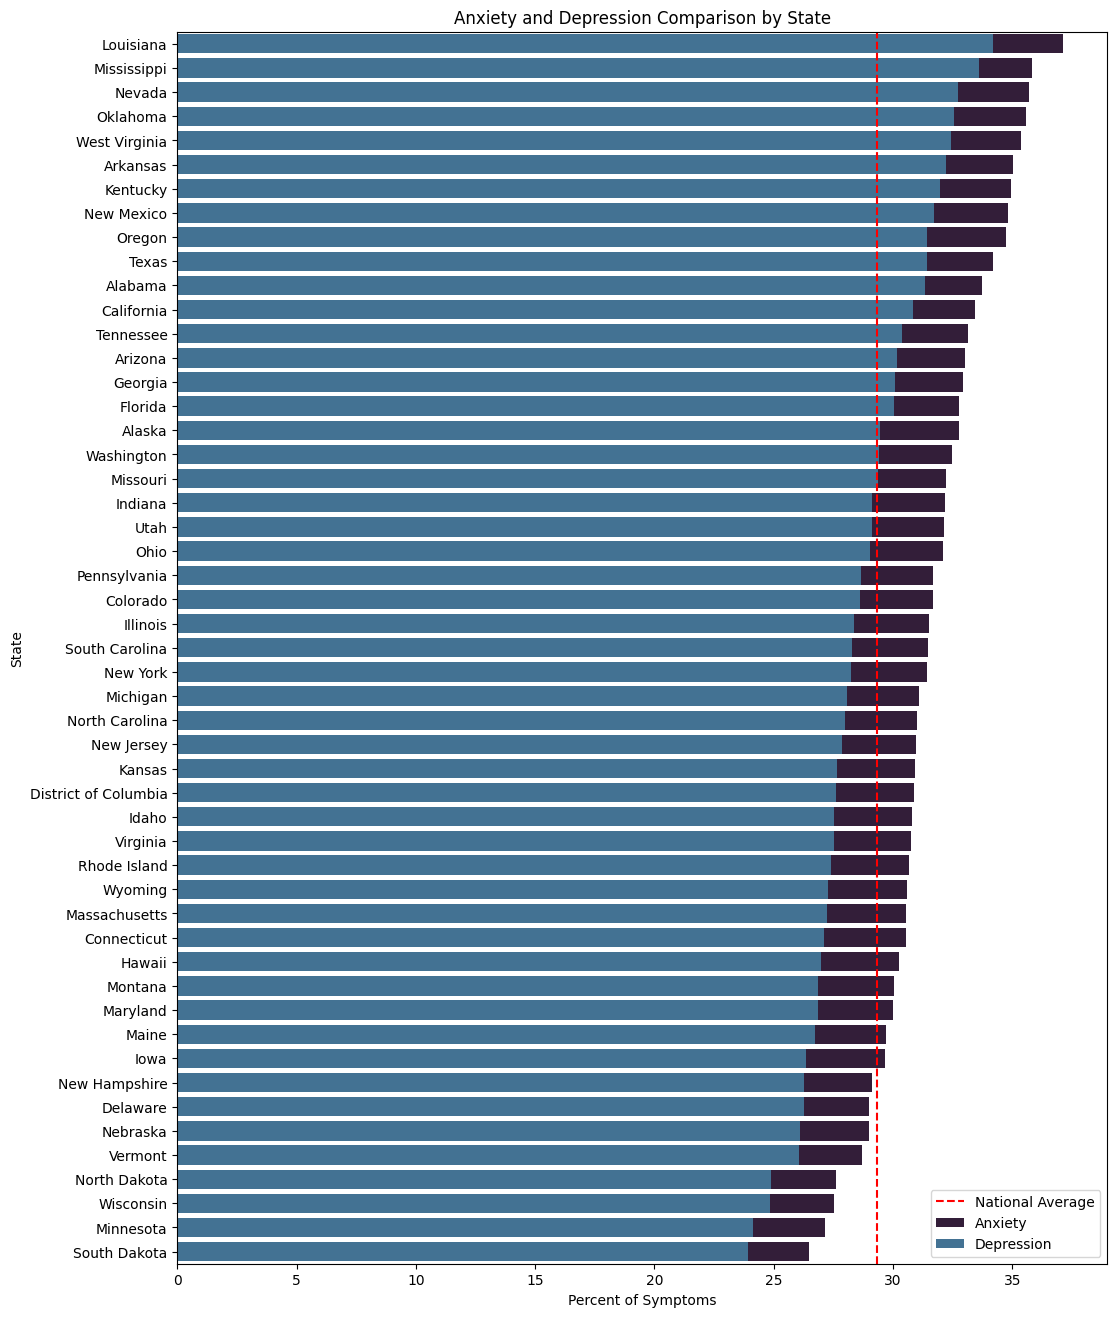

In [176]:
# Barplot looking at depression and anxiety for each state
# Set the figure size
f, ax = plt.subplots(figsize=(12, 16))

avg_values_d = dep_state.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index
avg_values_s = anx_state.groupby('Subgroup')['Value'].mean().sort_values(ascending=False).index


# Plotting the anxiety values
sns.barplot(x='Value', y='Subgroup', data=anx_state,
            label="Anxiety", color="#35193e", ax=ax, errorbar=None, order=avg_values_s)

# Plotting the depression values next to anxiety
sns.barplot(x='Value', y='Subgroup', data=dep_state,
            label="Depression", color="#3575a1", ax=ax, errorbar=None, order=avg_values_d)

# Adding the national estimate average for all yearly data 
ax.axvline(x=29.33, color='red', linestyle='--', label='National Average')


ax.set(xlabel="Percent of Symptoms", ylabel="State", title="Anxiety and Depression Comparison by State")
ax.legend()
plt.show()

# Final Insights and Conclusions 

### General Insights 
* National estimates of anxiety and depression symptoms have declined since 2020 with peak COVID-19 being the highest.<br>
* The national estimated **maximum** of anxiety and depression has also declined since 2020 while the minimums have also decreased every year. <br>
* Summer months for all demographics tend to be the lowest value of both anxiety and depression symptoms while fall is the highest (specifically November). <br>
* Anxiety is higher than depression in all demographics. 
<br>

### Age
* Younger individuals have a substantially higher prevalence of depression and anxiety compared to older ages.
* Both anxiety and depression symptoms decline in each age group with 18-29 to 50-59 year olds having averages that are double 70-79 and 80 years and above.

### Sex  
* Females have a higher prevalence than males in both anxiety and depression symptoms. 

### Race 
* Asians, single race have the lowest for both anxiety and depression.
* Other and multiple races have the highest for both anxiety and depression. 

### Education 
* Throughout the data, it is evident that their is a strong correlation between education and anxiety/depression symptoms. It's also important to note the trend of age compared to education as those less educated tend to be younger. 

### Disability
* Individuals with a disability have more than **double** both anxiety and depression symptoms compared to those without a disability. 

### Gender Identity 
* Transgender individuals have more than **double** cis gender males and females. 

### Sexual Orientation 
* Bisexuals have the highest prevalence of anxiety and depression while doubling the prevalence of straight individuals. 
* Important to note the absence of data for the month of May for the sexual orientation group. It appears there is a discrepancy in the data. 

### State 
* Only 8 states were lower than the national average of both depression and anxiety (with all states being Northern states). 
* 12 states were higher than the national average for depression all 4 studied years while only 10 states for anxiety were higher than the national average for all 4 studied years. 

# Next Steps 
Moving forward with this analysis, I would use different variables like crime statistics, weather patterns, and political movements. As far as next analytical steps go, I would eventually like to create a predictive model in order to determine who is more susceptible to depression and anxiety through individual demographics. 

I would also propose to introduce further questions within the survey like martial status and family information (like children). 